# Brazilian E-Commerce Public Dataset by Olist

This is a Brazilian ecommerce public dataset of orders made at Olist Store. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. We also released a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates.

**Context**
* This dataset was generously provided by Olist, the largest department store in Brazilian marketplaces. Olist connects small businesses from all over Brazil to channels without hassle and with a single contract. Those merchants are able to sell their products through the Olist Store and ship them directly to the customers using Olist logistics partners. 

**Objective**

To analyze customer purchasing behavior, sales performance, and delivery efficiency within the Brazilian e-commerce market. This study aims to identify key trends in product sales, customer satisfaction, and regional demand. Additionally, it seeks to uncover factors affecting late deliveries, low-rated products, and payment preferences to optimize business operations and enhance customer experience.

**Product Quality:** Discovering the products categories that are more prone to customer insatisfaction.

**Increase Revenue:** Identifying top-performing product categories and regions to make promotional and strategic partnerships. 

**Improve Customer Experience:** Understanding customer buying patterns and satisfaction levels through Number of orders and review analysis. To improve service quality. 

**Optimize Operations:** Analyse logistics and delivery performance to reduce shipping delays and operational costs.

**For Strategic Growth:** Getting data-driven insights for market segmentation, product pricing 
strategies, and seller performance, aligning business strategy with customer demands and market 
opportunities.

**Feature Engineering:** Create features from this rich dataset or attach some external public information to it.

In [331]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px


In [413]:
customer = pd.read_csv(r'E:\inno\olist_EDA\customer_data.csv')
geo_location = pd.read_csv(r'E:\inno\olist_EDA\olist_geolocation_dataset.csv')
order_items = pd.read_csv(r'E:\inno\olist_EDA\olist_order_items_dataset.csv')
order_payments = pd.read_csv(r'E:\inno\olist_EDA\olist_order_payments_dataset.csv')
order_reviews = pd.read_csv(r'E:\inno\olist_EDA\olist_order_reviews_dataset.csv')
orders = pd.read_csv(r'E:\inno\olist_EDA\olist_orders_dataset.csv')
products = pd.read_csv(r'E:\inno\olist_EDA\olist_products_dataset.csv')
sellers = pd.read_csv(r'E:\inno\olist_EDA\olist_sellers_dataset.csv')
product_category = pd.read_csv(r'E:\inno\olist_EDA\product_category_name_translation.csv')

#### Customer

In [333]:
customer

,Unnamed: 0,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,cust_Region
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Southeast
1,1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Southeast
2,2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Southeast
3,3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Southeast
4,4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Southeast
...,...,...,...,...,...,...,...
99158,99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,Southeast
99159,99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,Southeast
99160,99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,Northeast
99161,99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,South


In [334]:
customer.isna().sum()

Unnamed: 0                  0
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
cust_Region                 0
dtype: int64

In [335]:
customer.duplicated().value_counts()

False    99163
Name: count, dtype: int64

In [336]:
top5_cities = customer.groupby('customer_city').agg(No_of_customers = ('customer_unique_id', 'count')).sort_values(by= 'No_of_customers', ascending=False).reset_index().head()
top5_states = customer.groupby('customer_state').agg(No_of_customers = ('customer_unique_id', 'count')).sort_values(by= 'No_of_customers', ascending=False).reset_index().head()
top5_region = customer.groupby('cust_Region').agg(No_of_customers = ('customer_unique_id', 'count')).sort_values(by= 'No_of_customers', ascending=False).reset_index().head()

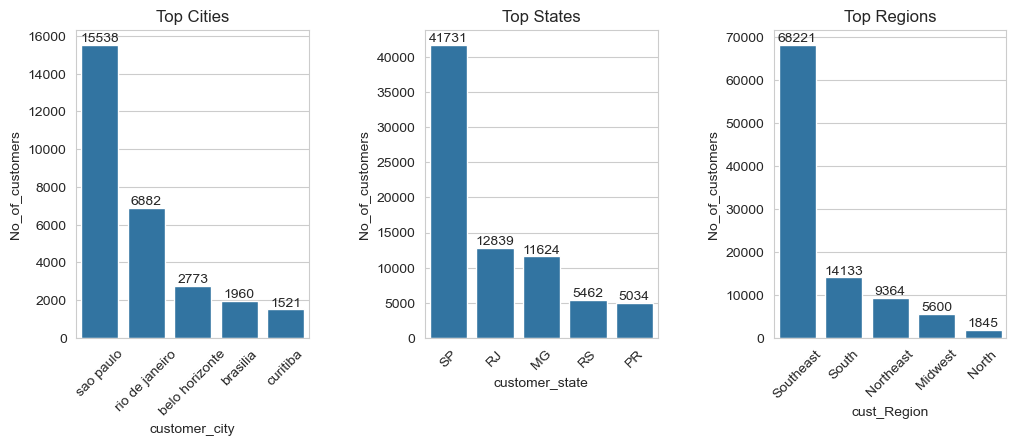

In [337]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
plt.subplots_adjust(wspace=0.5)

# Plot for Top Cities
sns.barplot(x=top5_cities['customer_city'], y=top5_cities['No_of_customers'], ax=ax[0])
ax[0].set_title('Top Cities')
ax[0].tick_params(axis='x', rotation=45)
ax[0].bar_label(ax[0].containers[0], fmt='%d')

# Plot for Top States
sns.barplot(x=top5_states['customer_state'], y=top5_states['No_of_customers'], ax=ax[1])
ax[1].set_title('Top States')
ax[1].tick_params(axis='x', rotation=45)
ax[1].bar_label(ax[1].containers[0], fmt='%d')

# Plot for Top Regions
sns.barplot(x=top5_region['cust_Region'], y=top5_region['No_of_customers'], ax=ax[2])
ax[2].set_title('Top Regions')
ax[2].tick_params(axis='x', rotation=45)
ax[2].bar_label(ax[2].containers[0], fmt='%d')

plt.show()


* `Distribution of Top 5 Cities, States, Regions most Customers`
* `Sao Paulo` city have most number of customers(15538)
* `SP(Sao Paulo)` is the state having customers(41731)
* `South East(Mato Grosso do Sul,  Espírito Santo, Rio de Janeiro)` have 68221 customers.

In [338]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [403]:
# converting into datetime format
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date']) 

In [340]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


<Figure size 1200x600 with 0 Axes>

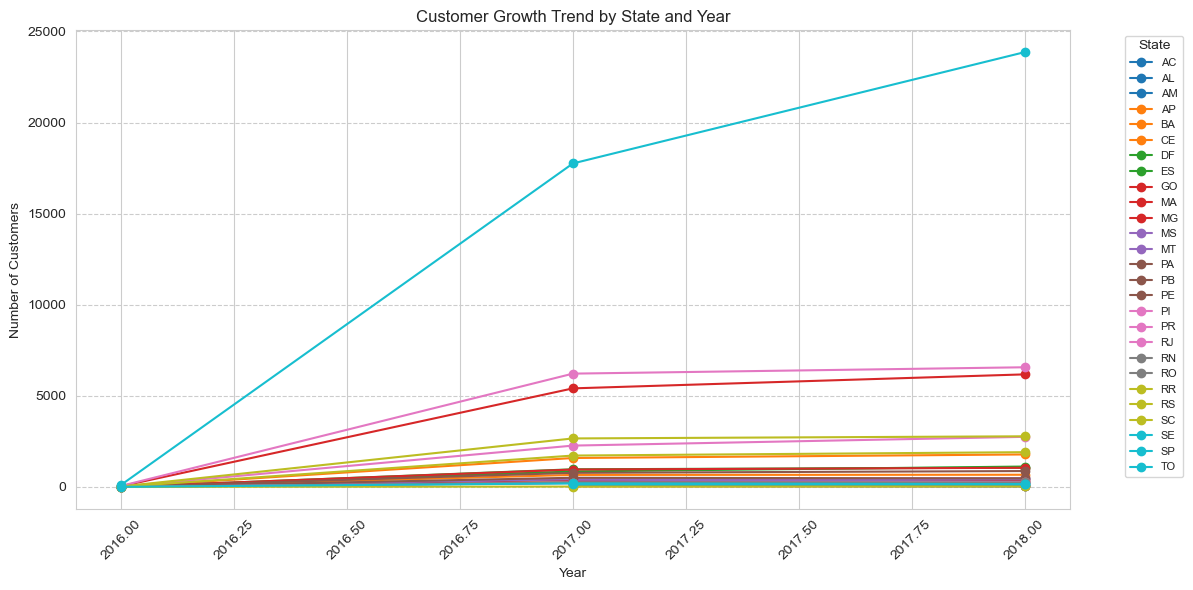

In [341]:
orders['order_year'] = orders['order_purchase_timestamp'].dt.year

merged_data = pd.merge(orders, customer, on="customer_id", how="inner")
customer_trend = merged_data.groupby(['customer_state', 'order_year'])['customer_unique_id'].count().reset_index()

customer_trend_pivot = customer_trend.pivot(index="order_year", columns="customer_state", values="customer_unique_id")

# Plot
plt.figure(figsize=(12, 6))
customer_trend_pivot.plot(kind='line', marker='o', colormap='tab10', figsize=(12, 6))
plt.xlabel("Year")
plt.ylabel("Number of Customers")
plt.title("Customer Growth Trend by State and Year")
plt.legend(title="State", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


* `SP(São Paulo), PR(Paraná), MG( Minas Gerais)` states have siginificant rise in three years (2016, 2017, 2018)

In [342]:
customer_trend_pivot.T

order_year,2016,2017,2018
customer_state,,,
AC,NaN,54.0,27.0
AL,2.0,207.0,203.0
AM,NaN,75.0,73.0
AP,NaN,29.0,39.0
BA,4.0,1586.0,1781.0
CE,8.0,657.0,667.0
DF,6.0,846.0,1117.0
ES,4.0,966.0,1057.0
GO,9.0,953.0,1049.0


In [343]:
# Customers trend by year
# Extract year from the timestamp
orders["order_year"] = orders["order_purchase_timestamp"].dt.year

# Count unique customers per year
customer_trend = orders.groupby("order_year")["customer_id"].nunique().reset_index()
customer_trend.rename(columns={"customer_id": "unique_customers"}, inplace=True)

# Merge with customer data to analyze by state
customer_orders = orders.merge(customer, on="customer_id", how="left")

# Count unique customers per year and state
customer_state_trend = customer_orders.groupby(["order_year", "customer_state"])["customer_id"].nunique().reset_index()
customer_state_trend.rename(columns={"customer_id": "unique_customers"}, inplace=True)

state_trend_pivot = customer_state_trend.pivot(index="customer_state", columns="order_year", values="unique_customers")
state_trend_pivot["decreasing"] = state_trend_pivot.apply(lambda x: x.diff().dropna().lt(0).all(), axis=1)

decreasing_states = state_trend_pivot[state_trend_pivot["decreasing"]].drop(columns=["decreasing"])



In [344]:
customer_trend


,order_year,unique_customers
0,2016,329
1,2017,45101
2,2018,54011


In [345]:
decreasing_states


order_year,2016,2017,2018
customer_state,,,
AC,NaN,54.0,27.0
AM,NaN,75.0,73.0
RO,NaN,140.0,111.0


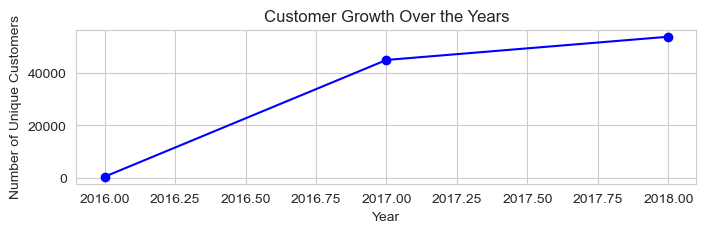

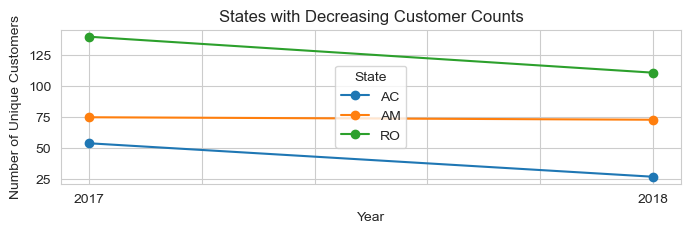

In [346]:
# Plot overall customer growth trend
plt.figure(figsize=(8, 2))
plt.plot(customer_trend["order_year"], customer_trend["unique_customers"], marker="o", linestyle="-", color="b")
plt.xlabel("Year")
plt.ylabel("Number of Unique Customers")
plt.title("Customer Growth Over the Years")
plt.grid(True)
plt.show()

# Plot state-wise decreasing trends
decreasing_states.T.plot(kind="line", marker="o", figsize=(8, 2))
plt.xlabel("Year")
plt.ylabel("Number of Unique Customers")
plt.title("States with Decreasing Customer Counts")
plt.legend(title="State")
plt.grid(True)
plt.show()


* `AC(Acre)`, `AM(Amazonas)`, `RO(Rondônia)` states which belongs to North Region have decreased in customers.

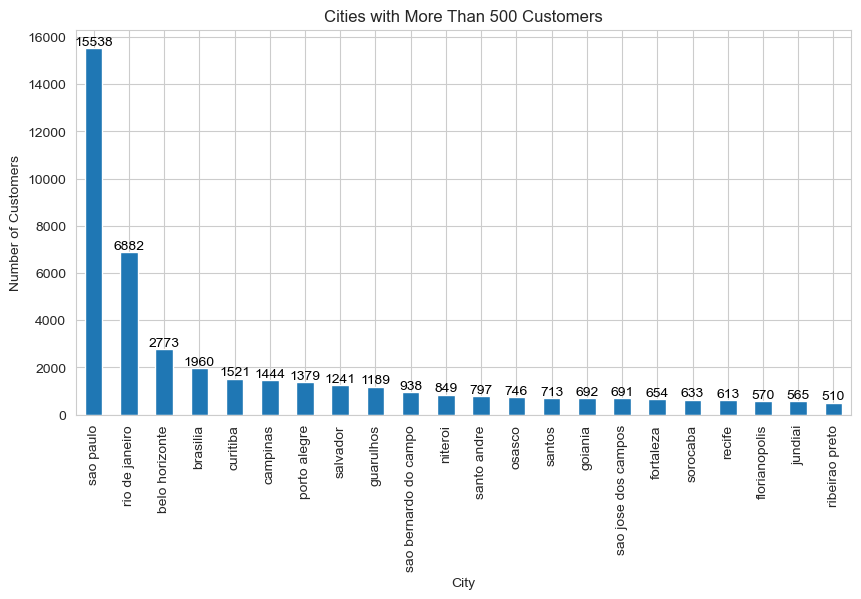

In [347]:
# Cities with more than 500 Customers
city_customer_count = customer['customer_city'].value_counts()
cities_above_500 = city_customer_count[city_customer_count>500]

plt.figure(figsize=(10,5))
ax= cities_above_500.plot(kind='bar')
plt.xlabel("City")
plt.ylabel("Number of Customers")
plt.title("Cities with More Than 500 Customers")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

* These are the cities having more than 500 customers
* These cities are belongs to South, Southeast, MidWest, Northeast.  

#### Sellers

In [348]:
sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [349]:
sellers.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [350]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [351]:
#Number of sellers per city
sellers.groupby('seller_city')['seller_id'].count().sort_values(ascending= False).reset_index()

,seller_city,seller_id
0,sao paulo,694
1,curitiba,127
2,rio de janeiro,96
3,belo horizonte,68
4,ribeirao preto,52
...,...,...
606,ivoti,1
607,itirapina,1
608,itau de minas,1
609,itapui,1


In [352]:
# Number of Sellers per Region
merged = sellers.merge(customer, left_on= 'seller_zip_code_prefix', right_on= 'customer_zip_code_prefix', how= 'left')
region = merged.groupby(['cust_Region'])['seller_id'].count().sort_values(ascending= False).reset_index()
region.rename(columns={'cust_Region': 'Region'})

,Region,seller_id
0,Southeast,35533
1,South,8346
2,Midwest,520
3,Northeast,448
4,North,34


* Both Northeast(MA, PI, CE, RN, PB, PE, AL, SE, BA) and North(RO, AC, AM, RR, PA, AP, TO) regions have less number of sellers

In [353]:
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [354]:
products.isna().mean()

product_id                    0.000000
product_category_name         0.018512
product_name_lenght           0.018512
product_description_lenght    0.018512
product_photos_qty            0.018512
product_weight_g              0.000061
product_length_cm             0.000061
product_height_cm             0.000061
product_width_cm              0.000061
dtype: float64

In [355]:
products = products.dropna()

In [356]:
products.duplicated().sum()

0

In [357]:
products= products.rename(columns= {'product_name_lenght':'product_name_length',
                          'product_description_lenght':'product_description_length'})

In [358]:
products.head()

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [359]:
products['product_category_name'].nunique()

73

* There are `73` different product categories.

In [360]:
products['product_category_name'].count()

32340

In [361]:
merged_products = products.merge(product_category, on= 'product_category_name', how= 'left')
total_products = merged_products['product_category_name_english'].value_counts()


In [363]:
pd.DataFrame(total_products).reset_index()

,product_category_name_english,count
0,bed_bath_table,3029
1,sports_leisure,2867
2,furniture_decor,2657
3,health_beauty,2444
4,housewares,2335
...,...,...
66,tablets_printing_image,9
67,fashion_childrens_clothes,5
68,home_comfort_2,5
69,security_and_services,2


In [364]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
order_year                          0
dtype: int64

In [365]:
orders['order_id'].duplicated().sum()

0

In [366]:
print('Total Orders Placed')
orders['order_id'].count()

Total Orders Placed


99441

In [367]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   order_year                     99441 non-null  int32         
dtypes: datetime64[ns](5), int32(1), object(3)
memory usage: 6.4+ MB


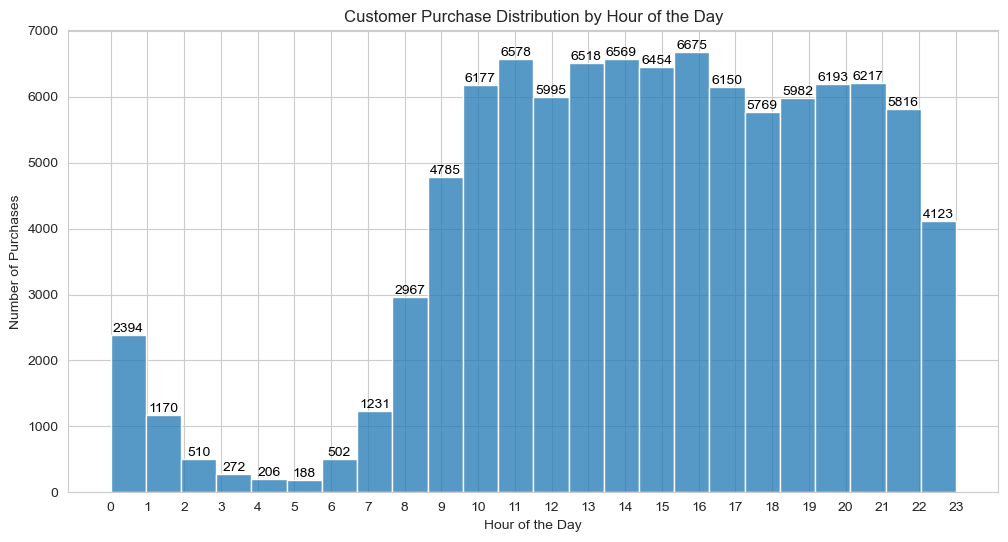

In [368]:
orders["purchase_hour"] = orders["order_purchase_timestamp"].dt.hour

plt.figure(figsize=(12, 6))
ax = sns.histplot(orders["purchase_hour"], bins=24)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2, height), 
                    ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel("Hour of the Day")
plt.ylabel("Number of Purchases")
plt.title("Customer Purchase Distribution by Hour of the Day")
plt.xticks(range(0, 24))
plt.show()


* Most number of purchases happend in between `10th hour and 21st hour` in a day

<Figure size 1200x600 with 0 Axes>

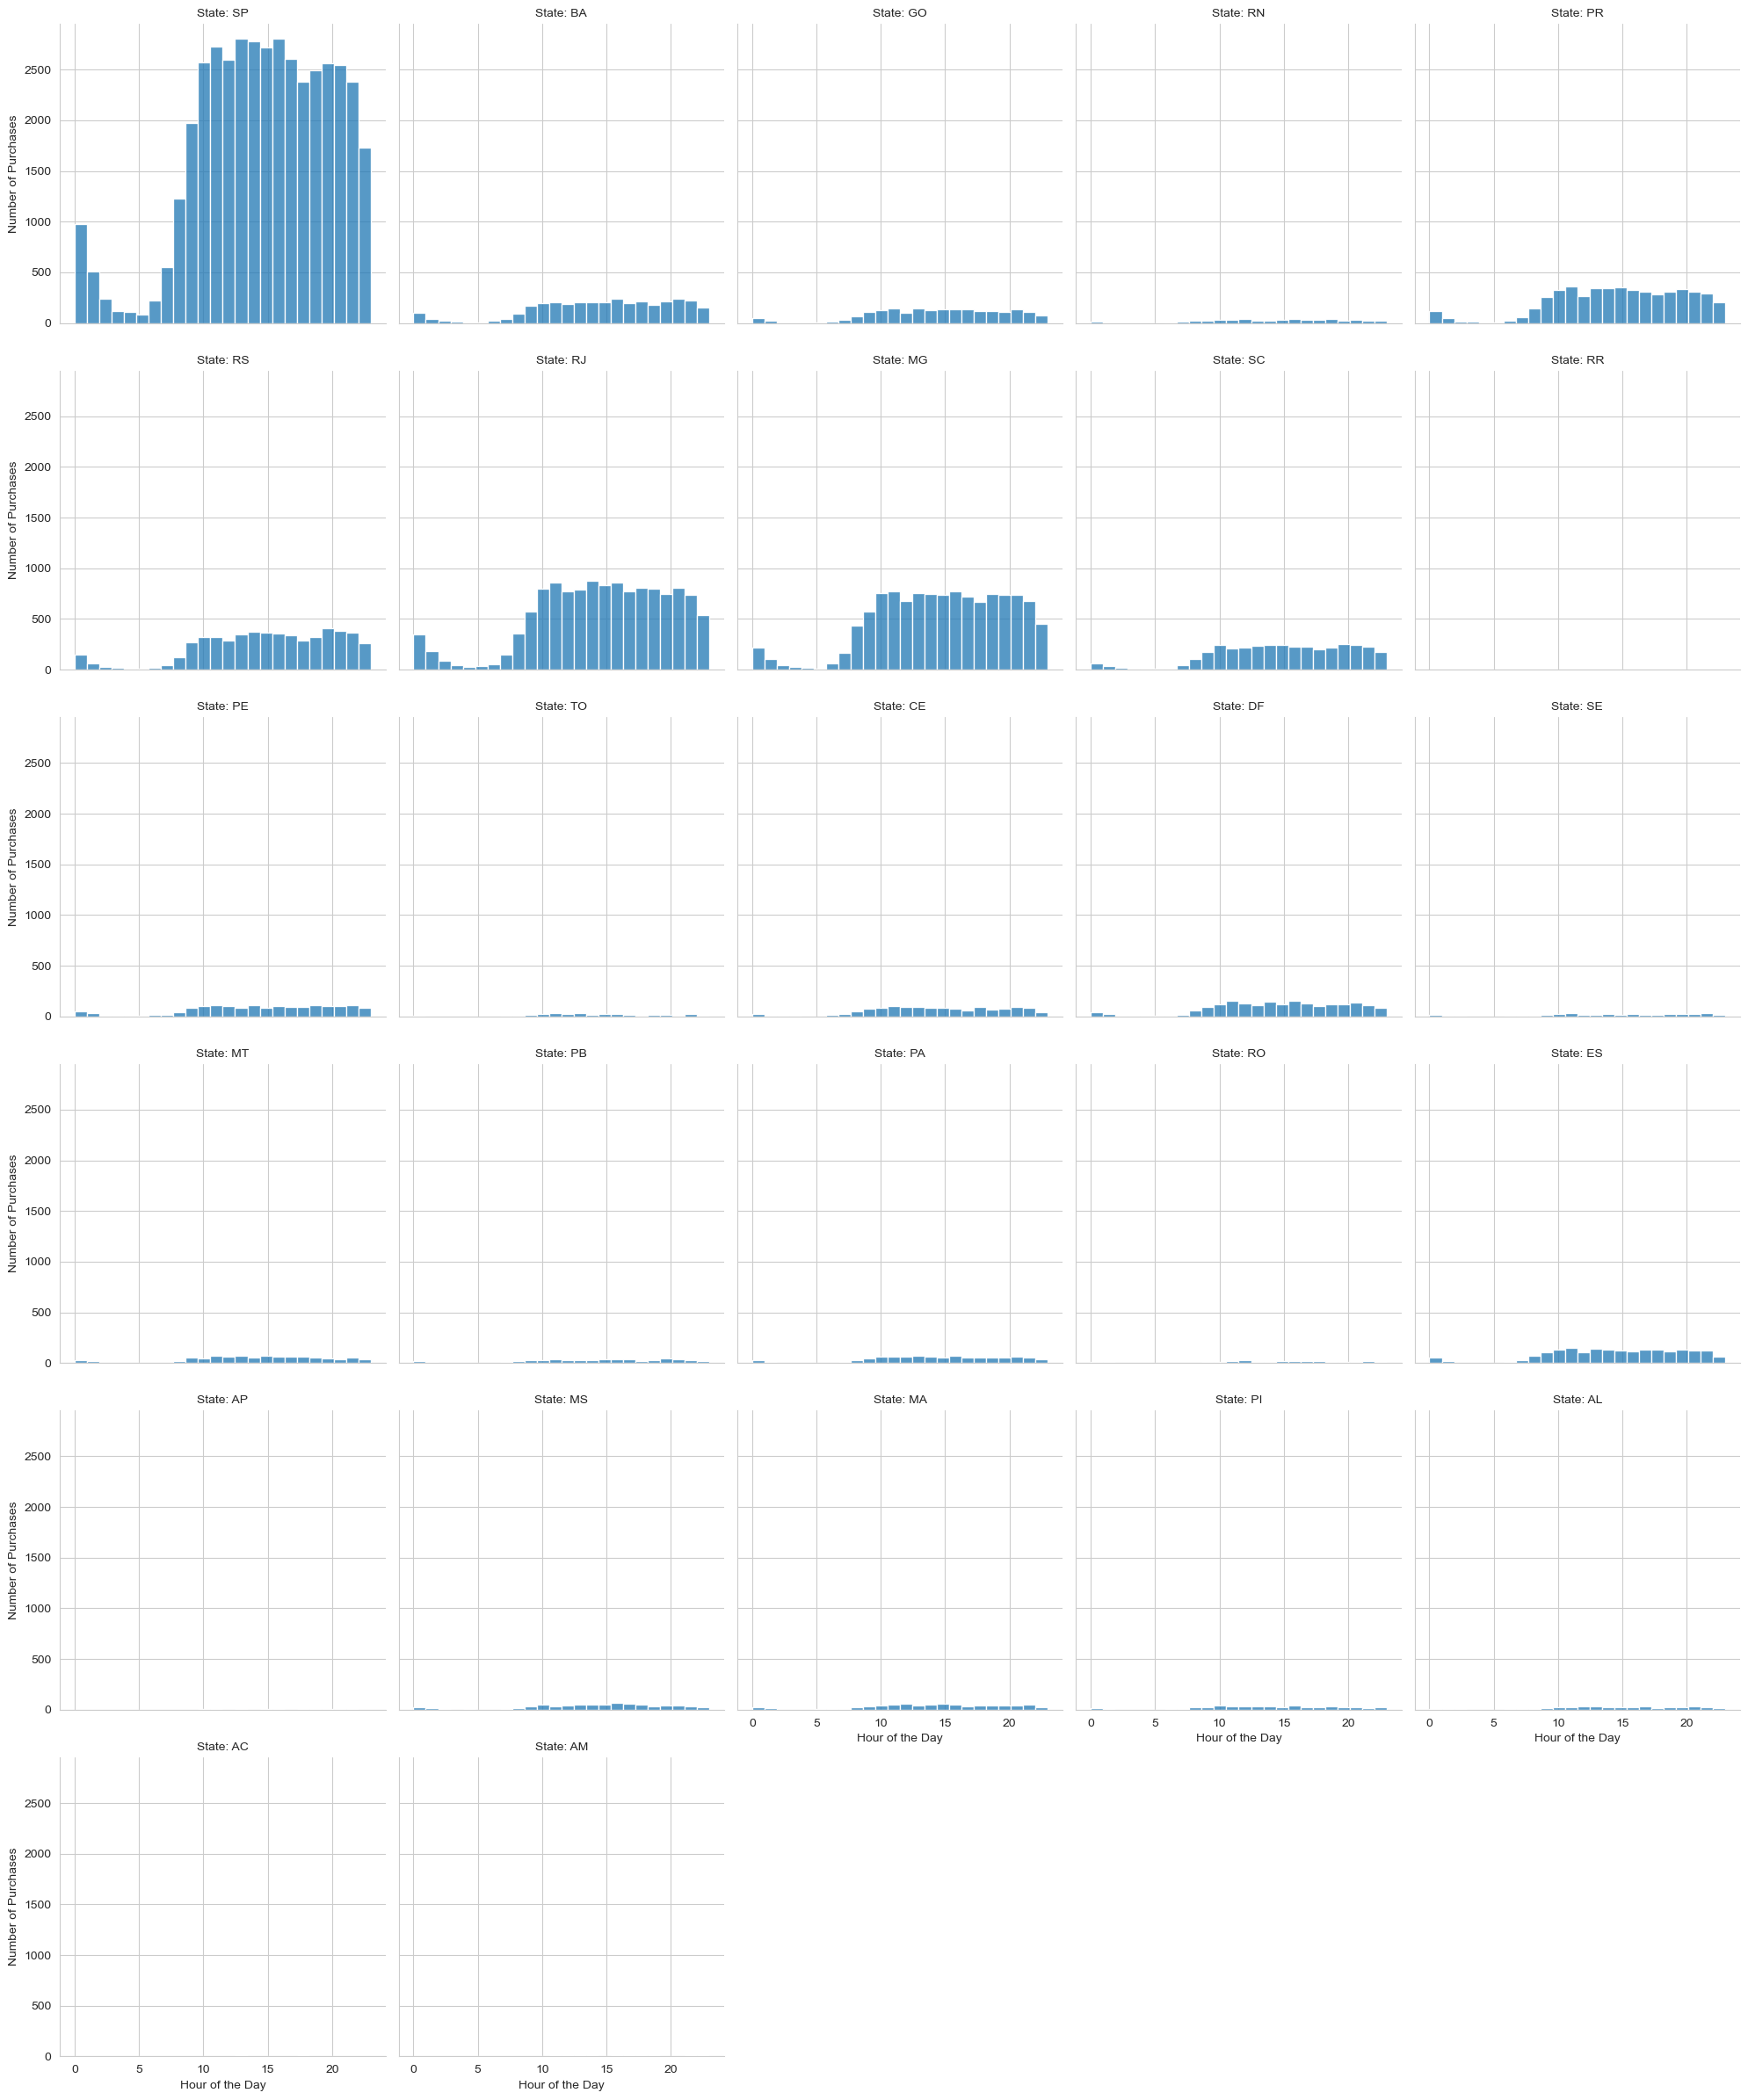

In [369]:
# State wise purchase hours

orders = orders.merge(customer[['customer_id', 'customer_state']], on='customer_id', how='left')

# Extract purchase hour
orders["purchase_hour"] = orders["order_purchase_timestamp"].dt.hour

# Plot purchase distribution by state
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
g = sns.FacetGrid(orders, col="customer_state", col_wrap=5, sharex=True, sharey=True, height=4)
g.map_dataframe(sns.histplot, x="purchase_hour", bins=24, kde=False)
g.set_axis_labels("Hour of the Day", "Number of Purchases")
g.set_titles(col_template="State: {col_name}")
plt.show()


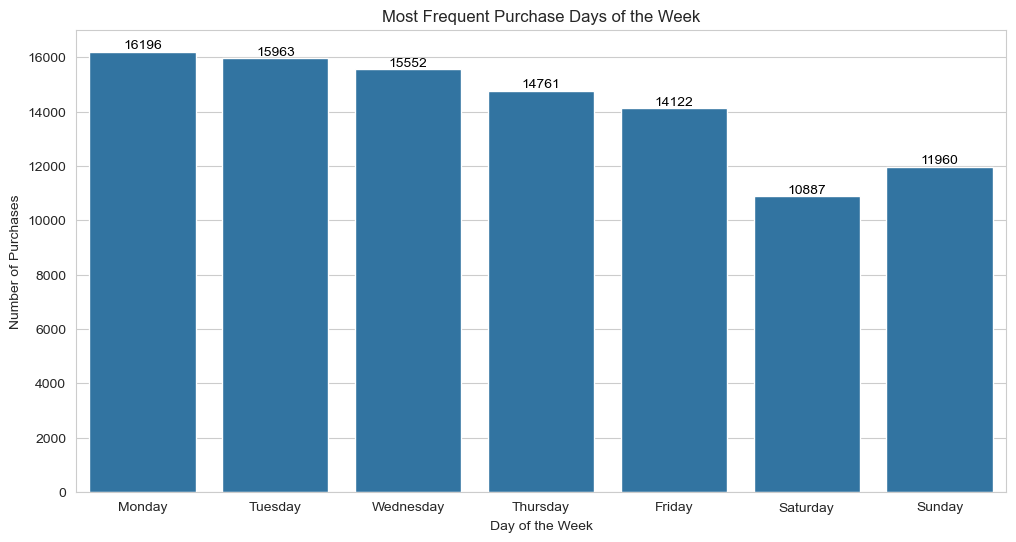

In [370]:
orders["purchase_day"] = orders["order_purchase_timestamp"].dt.day_name()

day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# plotting
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=orders, x="purchase_day", order=day_order)

# Add counts on top of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only label non-zero bars
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2, height), 
                    ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel("Day of the Week")
plt.ylabel("Number of Purchases")
plt.title("Most Frequent Purchase Days of the Week")
plt.show()

* Most number of orders were placed on `Monday(16196), Tuesday(15963), Wednesday(15552)`

<Figure size 1200x600 with 0 Axes>

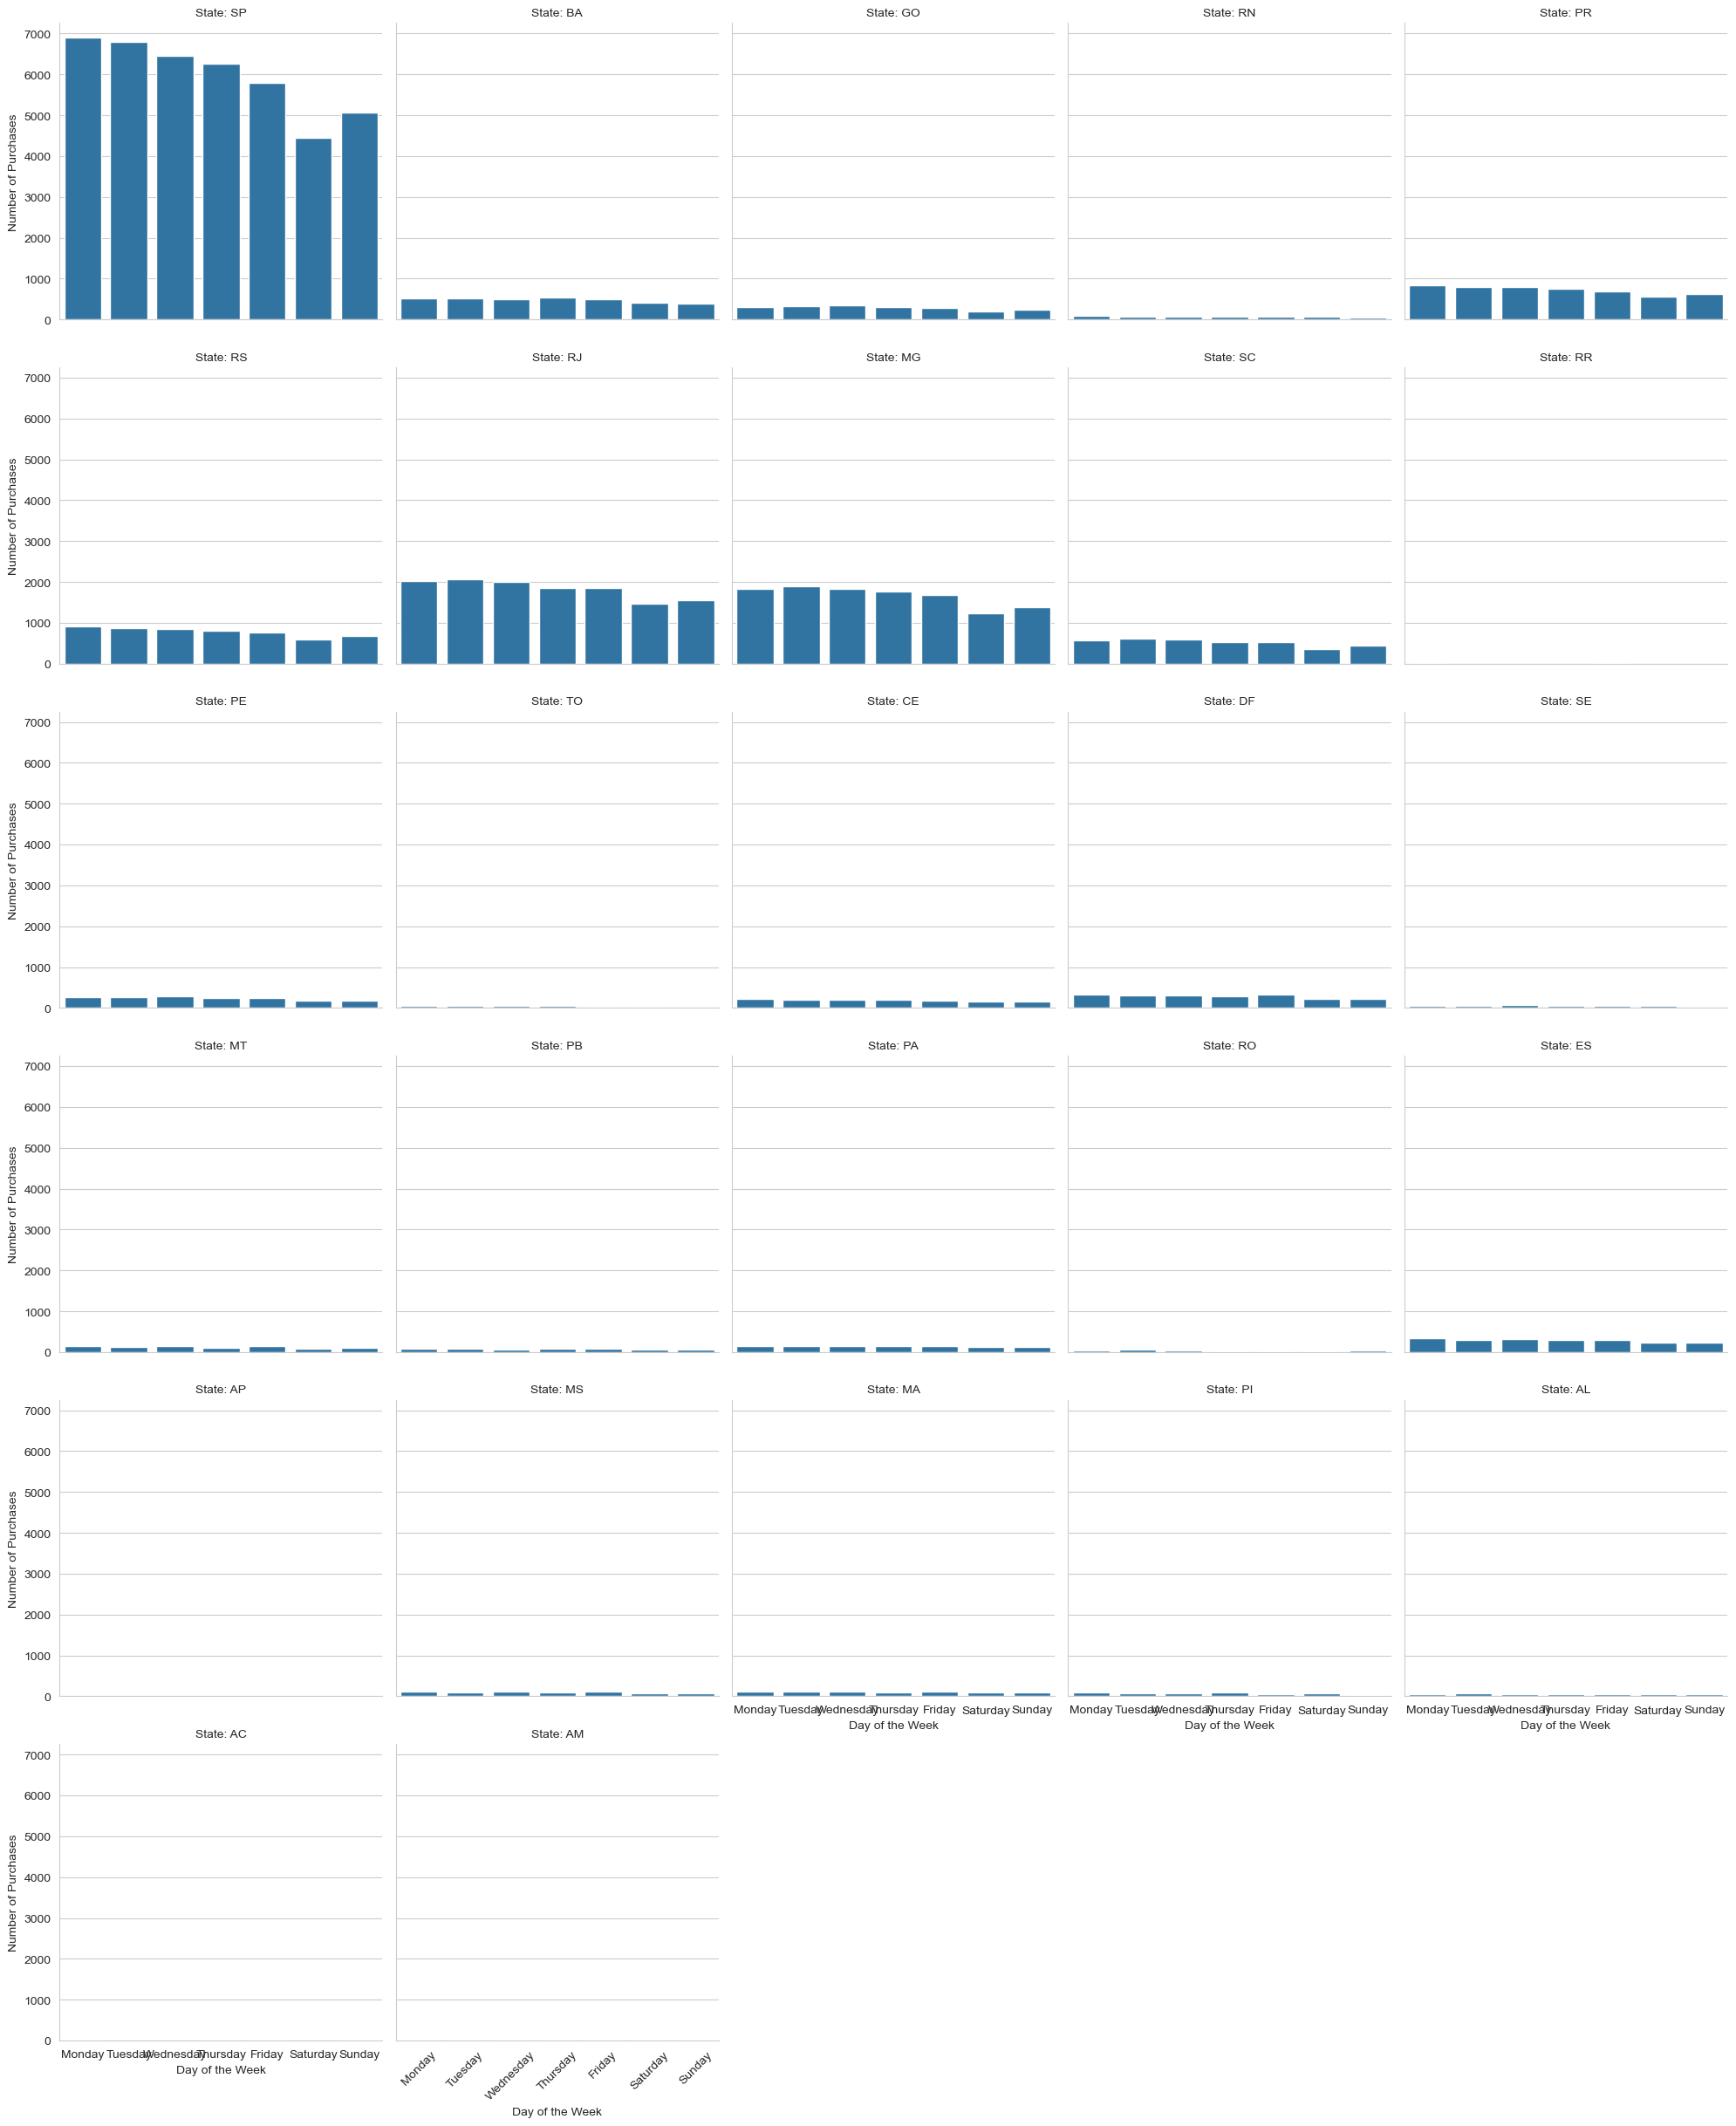

In [327]:
orders = orders.merge(customer[['customer_id', 'customer_state']], on='customer_id', how='left')

# Extract purchase day
orders["purchase_day"] = orders["order_purchase_timestamp"].dt.day_name()

# Define day order
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Plot purchase distribution by state
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
g = sns.FacetGrid(orders, col="customer_state", col_wrap=5, sharex=True, sharey=True, height=4)
g.map_dataframe(sns.countplot, x="purchase_day", order=day_order)
g.set_axis_labels("Day of the Week", "Number of Purchases")
g.set_titles(col_template="State: {col_name}")
plt.xticks(rotation=45)
plt.show()


* In most of the regions most number of orders were placed on `Monday, Tuesday, Wednesday`

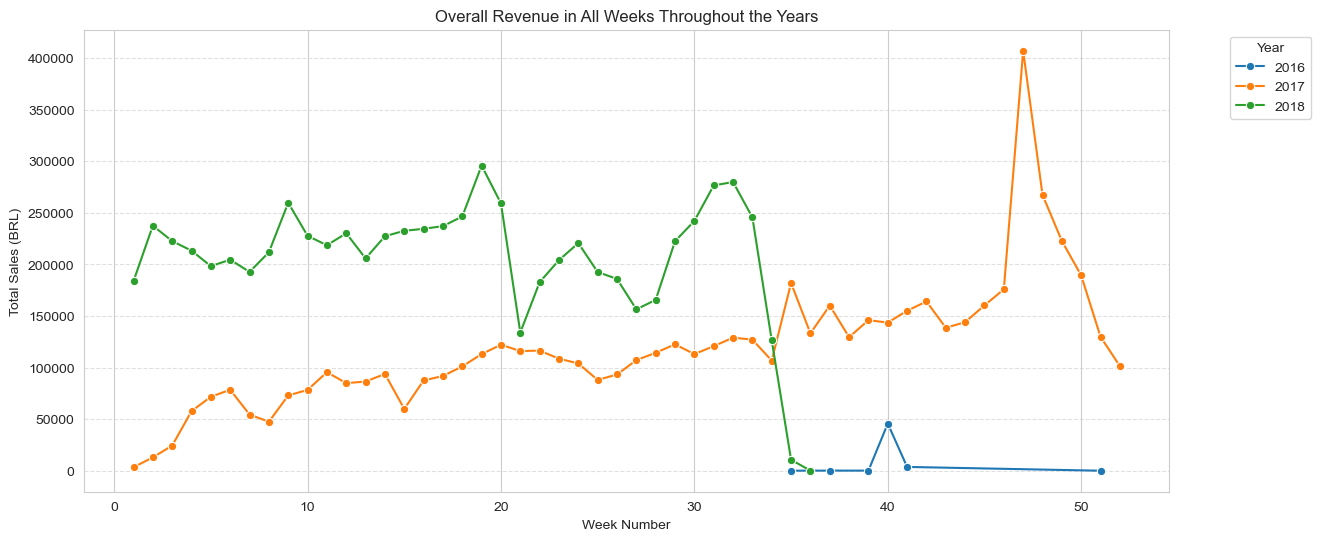

In [371]:
orders["order_year"] = orders["order_purchase_timestamp"].dt.year
orders["order_week"] = orders["order_purchase_timestamp"].dt.isocalendar().week

orders_sales_df = orders.merge(order_items, on="order_id")

# Calculate weekly total sales
weekly_sales = orders_sales_df.groupby(["order_year", "order_week"])["price"].sum().reset_index()

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=weekly_sales, x="order_week", y="price", hue="order_year", marker="o", palette="tab10")
plt.xlabel("Week Number")
plt.ylabel("Total Sales (BRL)")
plt.title("Overall Revenue in All Weeks Throughout the Years")
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


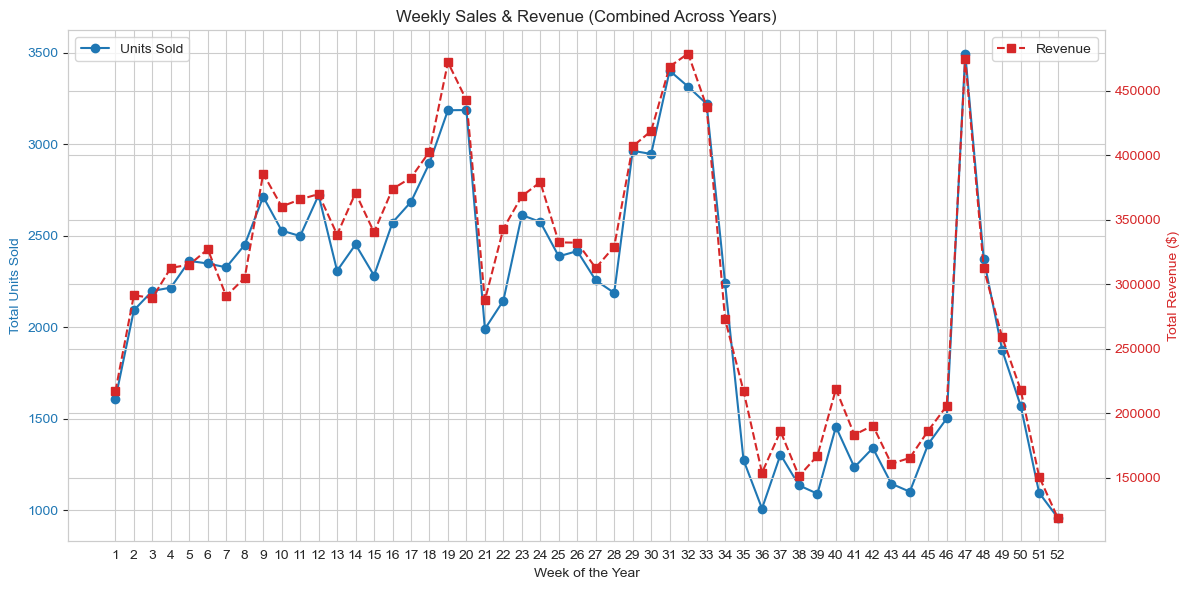

In [372]:
merged_df = order_items.merge(orders, on='order_id', how='left')

merged_df['order_purchase_timestamp'] = pd.to_datetime(merged_df['order_purchase_timestamp'])

merged_df['week'] = merged_df['order_purchase_timestamp'].dt.isocalendar().week

# Calculate total revenue (price + freight cost)
merged_df['total_revenue'] = merged_df['price'] + merged_df['freight_value']

# Aggregate sales and revenue by week across all years
weekly_sales_combined = merged_df.groupby(['week']).agg(
    total_units_sold=('order_item_id', 'count'),
    total_revenue=('total_revenue', 'sum')
).reset_index()

# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Week of the Year')
ax1.set_ylabel('Total Units Sold', color='tab:blue')
ax1.plot(weekly_sales_combined['week'], weekly_sales_combined['total_units_sold'], marker='o', linestyle='-', color='tab:blue', label='Units Sold')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xticks(range(1, 53))  # Shows all weeks on x-axis


ax2 = ax1.twinx()
ax2.set_ylabel('Total Revenue ($)', color='tab:red')
ax2.plot(weekly_sales_combined['week'], weekly_sales_combined['total_revenue'], marker='s', linestyle='--', color='tab:red', label='Revenue')
ax2.tick_params(axis='y', labelcolor='tab:red')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Weekly Sales & Revenue (Combined Across Years)')
plt.grid(True)
fig.tight_layout()
plt.show()


* week-9 ---> Carnival (Carnaval) in March
* week-19 ---> Mother's day (celebrated on Second sunday of May)
* week-24 ---> Festa de São João (Saint John’s Festival) in June
* week-32 ---> Father's day (celebrated on Second sunday of August)
* week-48 ---> Black Friday (celeberated on last friday of November) aslo (christmas)

* More sales and more Revenue generated in these weeks due to festivals seasons in brazil

In [411]:

merged_products_df = order_items.merge(products[['product_id', 'product_category_name']], on='product_id', how='left')
merged_products_df = merged_products_df.merge(orders, on='order_id', how='left')
merged_products_df = merged_products_df.merge(product_category, on="product_category_name", how="left")


merged_products_df['order_purchase_timestamp'] = pd.to_datetime(merged_products_df['order_purchase_timestamp'])

merged_products_df['week'] = merged_products_df['order_purchase_timestamp'].dt.isocalendar().week

# Calculate revenue per product
merged_products_df['revenue'] = merged_products_df['price'] * merged_products_df['order_item_id']

weekly_product_sales = merged_products_df.groupby(['week', 'product_category_name_english']).agg(
    total_units_sold=('order_item_id', 'count'),
    total_revenue=('revenue', 'sum')
).reset_index()

selected_weeks = [9, 19, 24, 32, 48]
filtered_sales = weekly_product_sales[weekly_product_sales['week'].isin(selected_weeks)]

top_3_sold_products = filtered_sales.groupby('week').apply(lambda x: x.nlargest(3, 'total_units_sold')).reset_index(drop=True)

top_3_sold_products_df = top_3_sold_products[['week', 'product_category_name_english', 'total_units_sold', 'total_revenue']]
print("Top 3 products sold and their revenue during the week 19, week 32, week 48")
top_3_sold_products_df

Top 3 products sold and their revenue during the week 19, week 32, week 48


C:\Users\DELL\AppData\Local\Temp\ipykernel_21320\2794710790.py:21: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,week,product_category_name_english,total_units_sold,total_revenue
0,9,computers_accessories,314,36318.88
1,9,furniture_decor,259,28104.86
2,9,sports_leisure,233,33336.56
3,19,health_beauty,310,43092.09
4,19,watches_gifts,260,51801.13
5,19,bed_bath_table,247,25094.50
6,24,bed_bath_table,281,28475.34
7,24,health_beauty,277,35001.87
8,24,housewares,196,21506.73
9,32,health_beauty,330,57126.91


* During these festival weeks these are most purchased products by customes.

In [374]:
merged_products_df = order_items.merge(products[['product_id', 'product_category_name']], on='product_id', how='left')
merged_products_df = merged_products_df.merge(product_category, on="product_category_name", how="left")

# Merge with orders to get order timestamps
merged_products_df = merged_products_df.merge(orders, on='order_id', how='left')

# Convert timestamp to datetime format
merged_products_df['order_purchase_timestamp'] = pd.to_datetime(merged_products_df['order_purchase_timestamp'])

# Extract week number
merged_products_df['week'] = merged_products_df['order_purchase_timestamp'].dt.isocalendar().week

# Calculate total revenue (price + freight cost)
merged_products_df['total_revenue'] = merged_products_df['price'] + merged_products_df['freight_value']

# Group by week and product, then aggregate sales and revenue
weekly_product_sales = merged_products_df.groupby(['week', 'product_category_name_english']).agg(
    total_units_sold=('order_item_id', 'count'),
    total_revenue=('total_revenue', 'sum')
).reset_index()

top_3_weekly_products = weekly_product_sales.groupby('week').apply(lambda x: x.nlargest(3, 'total_units_sold')).reset_index(drop=True)

top_3_weekly_products_df = top_3_weekly_products[['week', 'product_category_name_english', 'total_units_sold', 'total_revenue']]
top_3_weekly_products_df


C:\Users\DELL\AppData\Local\Temp\ipykernel_21320\4124869579.py:22: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,week,product_category_name_english,total_units_sold,total_revenue
0,1,bed_bath_table,161,17938.98
1,1,furniture_decor,147,16488.60
2,1,health_beauty,112,14214.43
3,2,bed_bath_table,197,23179.74
4,2,furniture_decor,184,17771.56
...,...,...,...,...
151,51,sports_leisure,87,12095.36
152,51,health_beauty,81,9708.24
153,52,bed_bath_table,99,10335.87
154,52,garden_tools,72,6386.10


In [375]:
merged_products_df = order_items.merge(products[['product_id', 'product_category_name']], on='product_id', how='left')

merged_products_df = merged_products_df.merge(orders, on='order_id', how='left')
merged_products_df = merged_products_df.merge(product_category, on="product_category_name", how="left")


# Extract month and year
merged_products_df['month'] = merged_products_df['order_purchase_timestamp'].dt.month
merged_products_df['year'] = merged_products_df['order_purchase_timestamp'].dt.year

# Calculate total revenue (price + freight cost)
merged_products_df['total_revenue'] = merged_products_df['price'] + merged_products_df['freight_value']

# Group by month and product, then aggregate sales and revenue
monthly_product_sales = merged_products_df.groupby(['year', 'month', 'product_category_name_english']).agg(
    total_units_sold=('order_item_id', 'count'),
    total_revenue=('total_revenue', 'sum')
).reset_index()

# Get top 3 products per month based on units sold
top_3_monthly_products = monthly_product_sales.groupby(['month']).apply(lambda x: x.nlargest(3, 'total_units_sold')).reset_index(drop=True)

top_3_monthly_products_df = top_3_monthly_products[['month', 'product_category_name_english', 'total_units_sold', 'total_revenue']]

top_3_monthly_products_df


C:\Users\DELL\AppData\Local\Temp\ipykernel_21320\3709253628.py:21: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,month,product_category_name_english,total_units_sold,total_revenue
0,1,bed_bath_table,848,90827.19
1,1,computers_accessories,707,96228.23
2,1,sports_leisure,654,104951.60
3,2,computers_accessories,981,118128.67
4,2,bed_bath_table,690,72014.38
5,2,health_beauty,668,98161.14
6,3,bed_bath_table,798,84107.25
7,3,sports_leisure,761,100283.39
8,3,computers_accessories,758,100661.31
9,4,bed_bath_table,746,86731.40


* These are the top 3 products sold per Month
* Bed_abth_table category is the top product sold in every month.

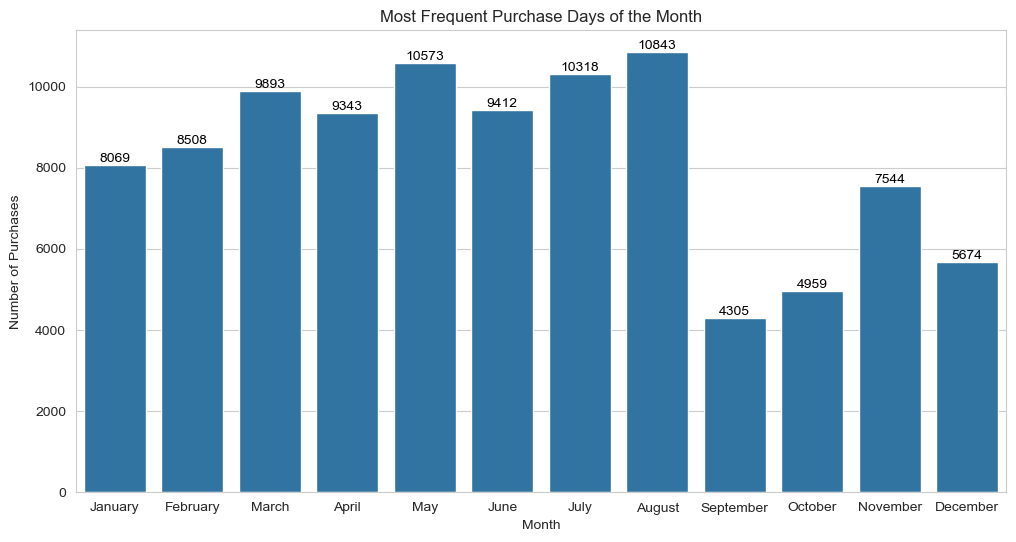

In [377]:
orders["purchase_day"] = orders["order_purchase_timestamp"].dt.month_name()

# Define order of days
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

# Create count plot
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=orders, x="purchase_day", order=month_order)

# Add counts on top of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only label non-zero bars
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2, height), 
                    ha='center', va='bottom', fontsize=10, color='black')

# Customize plot
plt.xlabel("Month")
plt.ylabel("Number of Purchases")
plt.title("Most Frequent Purchase Days of the Month")
plt.show()

* Most Number of orders were placed in the May(10573), July(10318), August(10843).

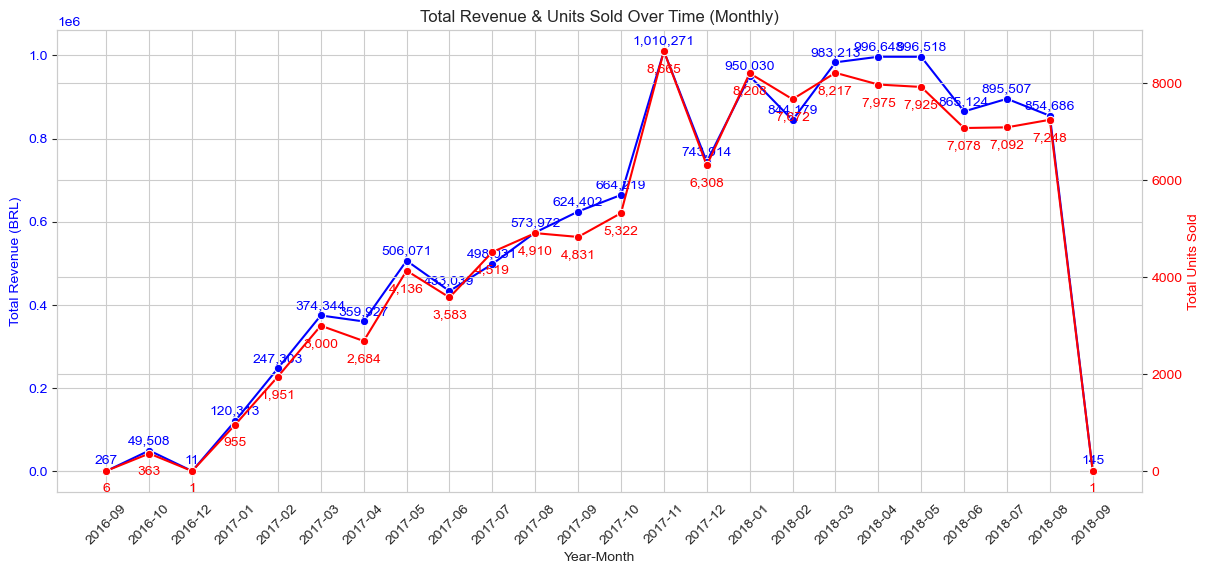

In [378]:
orders["order_year_month"] = orders["order_purchase_timestamp"].dt.to_period("M")

monthly_sales = orders.merge(order_items, on="order_id")

# Group by year-month to get total revenue and sold units
monthly_revenue_units = monthly_sales.groupby("order_year_month").agg(
    total_revenue=("price", "sum"), total_units_sold=("order_id", "count")
).reset_index()

# Convert period to string for plotting
monthly_revenue_units["order_year_month"] = monthly_revenue_units["order_year_month"].astype(str)

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot total revenue
sns.lineplot(data=monthly_revenue_units, x="order_year_month", y="total_revenue", 
             marker="o", color="blue", ax=ax1)
ax1.set_xlabel("Year-Month")
ax1.set_ylabel("Total Revenue (BRL)", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")
plt.xticks(rotation=45)
plt.grid(True)
plt.title("Total Revenue & Units Sold Over Time (Monthly)")

# Annotate total revenue points
for x, y in zip(monthly_revenue_units["order_year_month"], monthly_revenue_units["total_revenue"]):
    ax1.annotate(f"{y:,.0f}", (x, y), textcoords="offset points", xytext=(0, 5), 
                 ha='center', fontsize=10, color="blue")

# Create second y-axis for total units sold
ax2 = ax1.twinx()
sns.lineplot(data=monthly_revenue_units, x="order_year_month", y="total_units_sold", 
             marker="o", color="red", ax=ax2)
ax2.set_ylabel("Total Units Sold", color="red")
ax2.tick_params(axis='y', labelcolor="red")

# Annotate total units sold points
for x, y in zip(monthly_revenue_units["order_year_month"], monthly_revenue_units["total_units_sold"]):
    ax2.annotate(f"{y:,.0f}", (x, y), textcoords="offset points", xytext=(0, -15), 
                 ha='center', fontsize=10, color="red")

plt.show()


* In `2017`, May(4136, 506071), August(4910, 573972), Novmeber(8565, 1010271) has more Sales and generated more Revenue
* In `2018`, More Sales and Revenue generated in April(7975,996640), May(7925, 996518), August(7248, 854686) 

#### Delivery Performance


In [379]:
# Calculate the delivery rate: (Delivered Orders / Total Orders) * 100
total_orders = len(orders)
delivered_orders = len(orders[orders["order_status"] == "delivered"])

delivery_rate = (delivered_orders / total_orders) * 100
print('Delivery Accuracy Rate:')
delivery_rate


Delivery Accuracy Rate:


97.02034372140264

* Out of every 100 orders, 97 orders were delivered

In [380]:
orders["approval_time"] = (orders["order_approved_at"] - orders["order_purchase_timestamp"]).dt.total_seconds() / 3600  # Convert to hours

# Compute average approval time
average_approval_time = orders["approval_time"].mean()
print('Average approval time for each order')
average_approval_time # In hours


Average approval time for each order


10.41909430191969

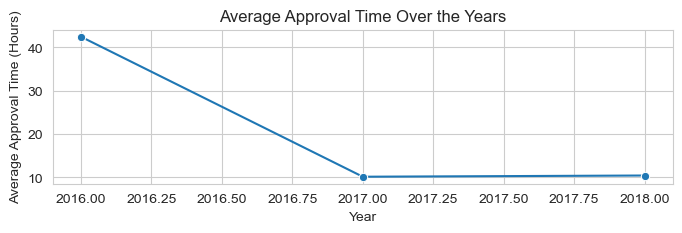

In [381]:
# Calculate average approval time per year
avg_approval_time_per_year = orders.groupby("order_year")["approval_time"].mean()

# Plot approval time over time
plt.figure(figsize=(8, 2))
sns.lineplot(x=avg_approval_time_per_year.index, y=avg_approval_time_per_year.values, marker="o")
plt.xlabel("Year")
plt.ylabel("Average Approval Time (Hours)")
plt.title("Average Approval Time Over the Years")
plt.grid(True)
plt.show()


* Average Time taking to aporove an order is approximetly 11 hours.
* Average approval time per order has become better over the years.
* i.e Order is getting Approved in very less time.

Overall Average Delivery Time: 12.09 days


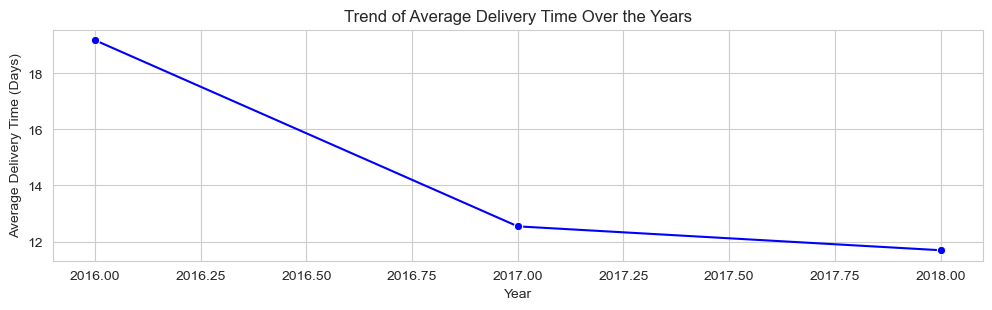

In [382]:
# Calculate delivery time (in days)
orders["delivery_time_days"] = (orders["order_delivered_customer_date"] - orders["order_purchase_timestamp"]).dt.days

# Calculate overall average delivery time
overall_avg_delivery_time = orders["delivery_time_days"].mean()
print(f"Overall Average Delivery Time: {overall_avg_delivery_time:.2f} days")

# Extract year and calculate average delivery time per year
orders["year"] = orders["order_purchase_timestamp"].dt.year
avg_delivery_time_per_year = orders.groupby("year")["delivery_time_days"].mean().reset_index()

# Plot the trend
plt.figure(figsize=(12, 3))
sns.lineplot(data=avg_delivery_time_per_year, x="year", y="delivery_time_days", marker="o", color="b")

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Average Delivery Time (Days)")
plt.title("Trend of Average Delivery Time Over the Years")
plt.grid(True)
plt.show()


* Average Time taking to deliver an order is approximetly 12 days.
* Average delivery time per order has aslo become better over the years.
* i.e Order is getting delivered in very less time comparing in three years.

In [ ]:
# Calculate delivery time in days
orders["delivery_time_days"] = (orders["order_delivered_customer_date"] - orders["order_purchase_timestamp"]).dt.days
orders_customers = orders.merge(customer, on="customer_id")

# Compute average delivery time per state
avg_delivery_time_state = orders_customers.groupby("customer_state")["delivery_time_days"].mean().reset_index()

# Rename column for clarity
avg_delivery_time_state = avg_delivery_time_state.rename(columns={"delivery_time_days": "avg_delivery_time_days"})

# Sort by delivery time
avg_delivery_time_state = avg_delivery_time_state.sort_values(by="avg_delivery_time_days", ascending=True)

# Display the results
avg_delivery_time_state


In [384]:
avg_delivery_time_state

,customer_state,avg_delivery_time_days
25,SP,8.297349
17,PR,11.505090
10,MG,11.534990
6,DF,12.486698
23,SC,14.479560
22,RS,14.817603
18,RJ,14.846840
8,GO,15.150924
11,MS,15.191155
7,ES,15.295123


* SP, PR, MG, DF states are getting their orders delivered in less time, while PA, AL, AM, AP, RR states are taking more time to deliver orders.

delivery_status
On-Time    91614
Late        7827
Name: count, dtype: int64


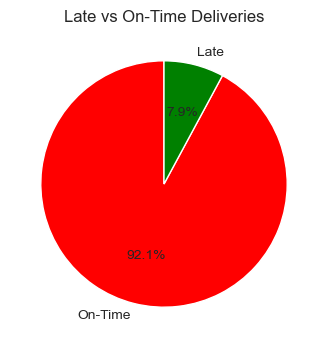

In [385]:
# Classify deliveries
orders["delivery_status"] = orders.apply(
    lambda row: "Late" if row["order_delivered_customer_date"] > row["order_estimated_delivery_date"] else "On-Time",
    axis=1
)

# Count late and on-time deliveries
delivery_counts = orders["delivery_status"].value_counts()

# Print results
print(delivery_counts)

# Plot Pie Chart
plt.figure(figsize=(4, 4))
plt.pie(delivery_counts, labels=delivery_counts.index, autopct="%1.1f%%", colors=["red", "green"], startangle=90)
plt.title("Late vs On-Time Deliveries")
plt.show()


In [386]:
canceled_orders_count = orders[orders["order_status"] == "canceled"].shape[0]
print(f"Total Canceled Orders: {canceled_orders_count}")

Total Canceled Orders: 625


In [404]:
# Calculate delivery time in days
orders["delivery_time_days"] = (orders["order_delivered_customer_date"] - orders["order_purchase_timestamp"]).dt.days

# Merge orders with order_items to get seller_id
orders_items_sellers = orders.merge(order_items, on="order_id").merge(customer, on="customer_id")

# Compute average delivery time per seller for each state
seller_delivery_time = orders_items_sellers.groupby(["customer_state", "seller_id"])["delivery_time_days"].mean().reset_index()

# Find the fastest seller per state (minimum delivery time)
fastest_sellers = seller_delivery_time.loc[seller_delivery_time.groupby("customer_state")["delivery_time_days"].idxmin()]

# Merge with sellers dataset to get seller location
fastest_sellers = fastest_sellers.merge(sellers, on="seller_id")

# Select relevant columns
fastest_sellers = fastest_sellers[["customer_state", "seller_id", "delivery_time_days", "seller_city", "seller_state"]]
fastest_sellers = fastest_sellers.rename(columns={"seller_city": "seller_location_city", "seller_state": "seller_location_state"})

# Create a pivot table
pivot_fastest_sellers = fastest_sellers.pivot_table(
    index="customer_state", 
    values=["seller_id", "delivery_time_days", "seller_location_city", "seller_location_state"],
    aggfunc="first"  # Since we have only one fastest seller per state
)

# Display the pivot table
pivot_fastest_sellers

,delivery_time_days,seller_id,seller_location_city,seller_location_state
customer_state,,,,
AC,7.000000,048c2757535328e0d7dac690ad3c0aae,franca,SP
AL,4.000000,ff1fb4c404b2efe68b03350a8dc24122,mogi das cruzes,SP
AM,4.000000,080102cd0a76b09e0dcf55fcacc60e05,belo horizonte,MG
AP,5.000000,2138ccb85b11a4ec1e37afbd1c8eda1f,sao paulo,SP
BA,2.142857,3b15288545f8928d3e65a8f949a28291,ibitinga,SP
CE,4.000000,578fa3a9cb6b6dceab39231ad59cdaca,fortaleza,CE
DF,2.000000,42bde9fef835393bb8a8849cb6b7f245,brasilia,DF
ES,2.000000,bc302730ea8cf49b5c74f579febb5bbf,campinas,SP
GO,1.000000,8ab42aa58097fd4668d60cc648225d5f,goiania,GO


* These are the states taking less time to deliver orders. Due to the Customer location and Seller location is near.

C:\Users\DELL\AppData\Local\Temp\ipykernel_21320\596971859.py:36: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




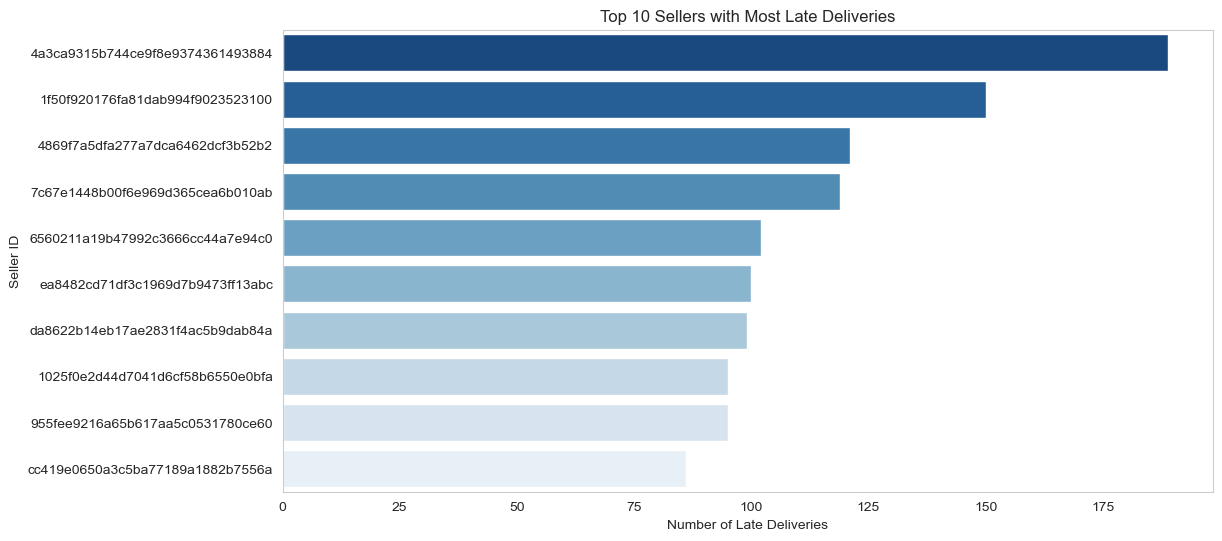

In [405]:
# Calculate late delivery days
orders["late_delivery_days"] = (orders["order_delivered_customer_date"] - orders["order_estimated_delivery_date"]).dt.days

# Filter only late deliveries (where late_delivery_days > 0)
late_deliveries = orders[orders["late_delivery_days"] > 0]

# Merge with order_items to get seller_id
late_orders_sellers = late_deliveries.merge(order_items, on="order_id")

# Merge with customers to get customer location
late_orders_sellers = late_orders_sellers.merge(customer, on="customer_id")

# Merge with sellers to get seller location
late_orders_sellers = late_orders_sellers.merge(sellers, on="seller_id")

# Select relevant columns
late_orders_sellers = late_orders_sellers[[
    "customer_id", "customer_city", "customer_state",
    "seller_id", "seller_city", "seller_state",
    "late_delivery_days"
]]

# Create a pivot table for better readability
pivot_late_deliveries = late_orders_sellers.pivot_table(
    index=["customer_id", "customer_city", "customer_state"], 
    values=["seller_id", "seller_city", "seller_state", "late_delivery_days"],
    aggfunc="first"  # Each customer only linked to one seller per order
)

pivot_late_deliveries


# Plot most affected sellers
plt.figure(figsize=(12, 6))
top_late_sellers = late_orders_sellers.groupby("seller_id")["late_delivery_days"].count().sort_values(ascending=False).head(10)
sns.barplot(x=top_late_sellers.values, y=top_late_sellers.index, palette="Blues_r")
plt.xlabel("Number of Late Deliveries")
plt.ylabel("Seller ID")
plt.title("Top 10 Sellers with Most Late Deliveries")
plt.grid(axis="x")
plt.show()


In [ ]:
pivot_late_deliveries

,,,late_delivery_days,seller_city,seller_id,seller_state
customer_id,customer_city,customer_state,,,,
000419c5494106c306a97b5635748086,niteroi,RJ,26.0,limeira,e5a3438891c0bfdb9394643f95273d8e,SP
0017a0b4c1f1bdb9c395fa0ac517109c,curitiba,PR,1.0,mogi das cruzes,2c9e548be18521d1c43cde1c582c6de8,SP
003f7d92ac63c512bb6584219806f8df,sao paulo,SP,8.0,ibitinga,bcc9dd23e2a8bd8267cf92b19304a1b9,SP
00459c4eb23e40414ca067d06fa303d4,cuiaba,MT,1.0,sao luis,06a2c3af7b3aee5d69171b0e14f0ee87,MA
004937d0f9d6ce15c2830c00c2f482e5,jaboticabal,SP,1.0,campo limpo paulista,3d871de0142ce09b7081e2b9d1733cb1,SP
...,...,...,...,...,...,...
ffd1de7d1aaba96f625807ae058cda15,nova friburgo,RJ,13.0,sao paulo,4371b634e0efc0e22b09b52907d9d469,SP
ffdc2af7160aed3bad21cbc8ec68c0c5,belo horizonte,MG,7.0,claudio,973f21788dfab357250f69a8dcb7ddee,MG
ffdd80d8f3655192a9d2a38d5b18732c,bofete,SP,5.0,ibitinga,4a3ca9315b744ce9f8e9374361493884,SP


* In above analysis we can observe that the seller and customer location are very far, thus taking longer time than expected to deliver the orders. 
* These states are getting their order delivered late. 

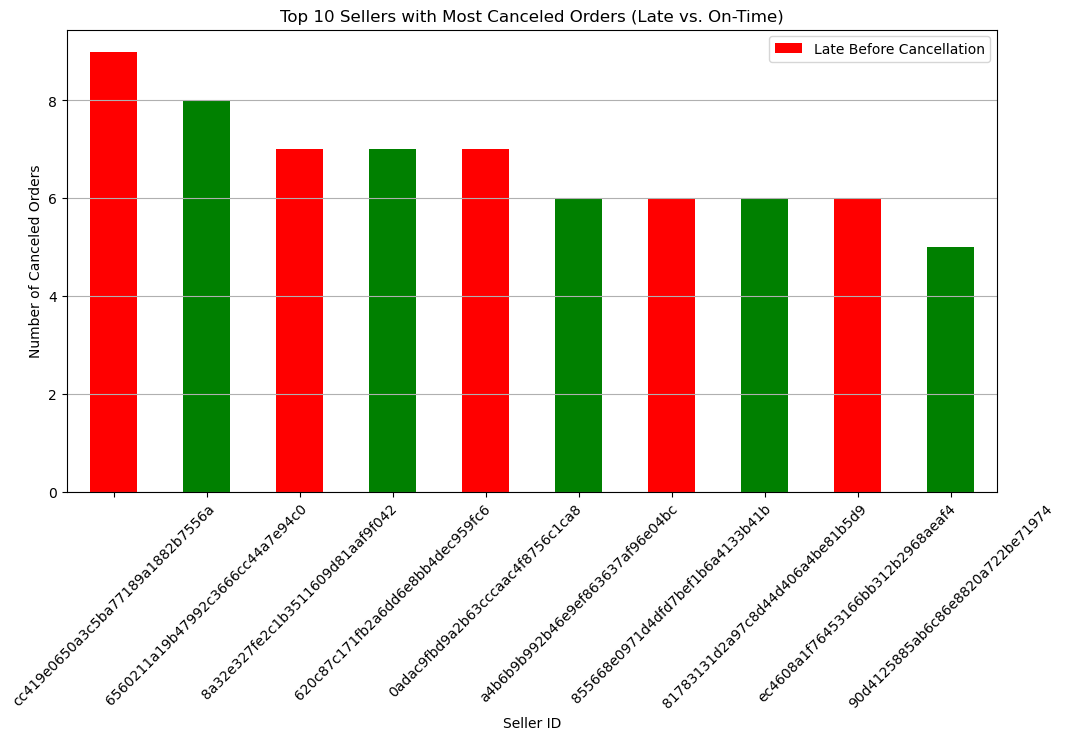

In [ ]:
# Filter only canceled orders
canceled_orders = orders[orders["order_status"] == "canceled"]

# Merge with order_items to get seller_id
canceled_orders_sellers = canceled_orders.merge(order_items, on="order_id")

# Determine if the canceled orders were late before cancellation
canceled_orders_sellers["was_late"] = canceled_orders_sellers.apply(
    lambda row: "Late Before Cancellation" if row["order_delivered_customer_date"] > row["order_estimated_delivery_date"] else "On-Time Before Cancellation",
    axis=1)

# Count canceled orders per seller
canceled_count_per_seller = canceled_orders_sellers.groupby(["seller_id", "was_late"]).size().unstack(fill_value=0)

# Display Pivot Table
#print(canceled_count_per_seller)

# Plot Top 10 Sellers with Most Canceled Orders
top_sellers = canceled_count_per_seller.sum(axis=1).sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_sellers.plot(kind="bar", color=["red", "green"])
plt.xlabel("Seller ID")
plt.ylabel("Number of Canceled Orders")
plt.title("Top 10 Sellers with Most Canceled Orders (Late vs. On-Time)")
plt.xticks(rotation=45)
plt.legend(["Late Before Cancellation", "On-Time Before Cancellation"])
plt.grid(axis="y")
plt.show()


* Late Before Cancellation
* This means the order was already delayed (past its estimated delivery date) before the customer canceled it.

* On-Time Before Cancellation
* This means the order was still within the estimated delivery window when the customer canceled it.

In [ ]:
# canceled orders
canceled_orders = orders[orders["order_status"] == "canceled"]

# Merge with order_items to get seller_id
canceled_orders_sellers = canceled_orders.merge(order_items, on="order_id")

# Count canceled orders per seller
canceled_count_per_seller = canceled_orders_sellers["seller_id"].value_counts().reset_index()

# Print results
canceled_count_per_seller.columns = ["seller_id", "no.of cancelled orders"]
canceled_count_per_seller


,seller_id,no.of cancelled orders
0,cc419e0650a3c5ba77189a1882b7556a,9
1,6560211a19b47992c3666cc44a7e94c0,8
2,8a32e327fe2c1b3511609d81aaf9f042,7
3,620c87c171fb2a6dd6e8bb4dec959fc6,7
4,0adac9fbd9a2b63cccaac4f8756c1ca8,7
...,...,...
324,4ce6e5f6c52515177e18c1c9361d8677,1
325,82bd0703a4aefd6b599e5bfdaed378fb,1
326,b45d7ebfb7378630f1bcd74b6ff86ff7,1
327,d66c305afaec317ebee552073a674429,1


In [ ]:
sellers[sellers['seller_id']=='cc419e0650a3c5ba77189a1882b7556a']

,seller_id,seller_zip_code_prefix,seller_city,seller_state
1413,cc419e0650a3c5ba77189a1882b7556a,9015,santo andre,SP


* 'cc419e0650a3c5ba77189a1882b7556a' this seller from SP(São Paulo) state have more number of cancelled orders.

In [ ]:
# Define regions based on Brazilian states
region_mapping = {
    "AC": "North", "AP": "North", "AM": "North", "PA": "North", "RO": "North", "RR": "North", "TO": "North",
    "AL": "Northeast", "BA": "Northeast", "CE": "Northeast", "MA": "Northeast", "PB": "Northeast", 
    "PE": "Northeast", "PI": "Northeast", "RN": "Northeast", "SE": "Northeast",
    "DF": "Central-West", "GO": "Central-West", "MT": "Central-West", "MS": "Central-West",
    "ES": "Southeast", "MG": "Southeast", "RJ": "Southeast", "SP": "Southeast",
    "PR": "South", "RS": "South", "SC": "South"
}

# Calculate revenue per seller
order_items["total_revenue"] = order_items["price"] + order_items["freight_value"]

# Group by seller to get total revenue and total products sold
seller_stats = order_items.groupby("seller_id").agg(
    total_revenue=("total_revenue", "sum"),
    total_products_sold=("order_id", "count")
).reset_index()

# Merge with seller location data
seller_stats = seller_stats.merge(sellers, on="seller_id", how="left")

# Map region based on seller state
seller_stats["region"] = seller_stats["seller_state"].map(region_mapping)

# Find the top seller by revenue
top_seller_by_revenue_df = seller_stats.sort_values(by="total_revenue", ascending=False).head(1)

# Find the top seller by total products sold
top_seller_by_products_df = seller_stats.sort_values(by="total_products_sold", ascending=False).head(1)

top_seller_by_revenue_df = top_seller_by_revenue_df[["seller_id", "seller_city", "seller_state", "region", "total_revenue", "total_products_sold"]]
top_seller_by_products_df = top_seller_by_products_df[["seller_id", "seller_city", "seller_state", "region", "total_revenue", "total_products_sold"]]



In [ ]:
top_seller_by_products_df

,seller_id,seller_city,seller_state,region,total_revenue,total_products_sold
1235,6560211a19b47992c3666cc44a7e94c0,sao paulo,SP,Southeast,151265.77,2033


In [ ]:
top_seller_by_revenue_df

,seller_id,seller_city,seller_state,region,total_revenue,total_products_sold
857,4869f7a5dfa277a7dca6462dcf3b52b2,guariba,SP,Southeast,249640.7,1156


* `6560211a19b47992c3666cc44a7e94c0` seller is selling more products but, `4869f7a5dfa277a7dca6462dcf3b52b2` is generating high Revenue.

In [ ]:
# Categorize deliveries
orders["delivery_status"] = orders.apply(
    lambda row: "On Time" if row["order_delivered_customer_date"] == row["order_estimated_delivery_date"] 
    else "On Time" if row["order_delivered_customer_date"] < row["order_estimated_delivery_date"] 
    else "Late", 
    axis=1
)

# Count number of on-time and before-time deliveries
delivery_counts = orders["delivery_status"].value_counts().reset_index()
delivery_counts.columns = ["delivery_status", "num_deliveries"]

delivery_counts


,delivery_status,num_deliveries
0,On Time,88649
1,Late,10792


In [ ]:
# Identify late deliveries
orders["is_late"] = orders["order_delivered_customer_date"] > orders["order_estimated_delivery_date"]

# Merge with customer data to get state information
orders_with_customers = orders.merge(customer, on="customer_id", how="left")

# Count late deliveries per state
late_deliveries_by_state = (
    orders_with_customers[orders_with_customers["is_late"]]
    .groupby("customer_state")
    .size()
    .reset_index(name="late_deliveries")
    .sort_values(by="late_deliveries", ascending=False))

late_deliveries_by_state


,customer_state,late_deliveries
25,SP,2386
18,RJ,1664
10,MG,636
4,BA,453
22,RS,381
23,SC,346
17,PR,243
7,ES,241
5,CE,196
15,PE,171


* North region we have very less number of sellers comapring to other regions

In [ ]:
# Identify early deliveries
orders["is_early"] = orders["order_delivered_customer_date"] < orders["order_estimated_delivery_date"]

# Merge with customers dataset to get state information
orders_with_state = orders.merge(customer, on="customer_id", how="left")

# Count early deliveries per state
early_deliveries_by_state = (
    orders_with_state[orders_with_state["is_early"]]
    .groupby("customer_state")
    .size()
    .reset_index(name="before_time_deliveries")
    .sort_values(by="before_time_deliveries", ascending=False)
)

# Display DataFrame
early_deliveries_by_state


,customer_state,before_time_deliveries
25,SP,38095
10,MG,10710
18,RJ,10676
22,RS,4959
17,PR,4669
23,SC,3201
4,BA,2795
8,GO,1788
6,DF,1780
7,ES,1748


* `North` and `North` region getting very less number of orders in time due seller & customer location distance.
* `São Paulo`, `Rio de Janeiro`, `Minas Gerais` are the only states getting their most number of deliveries on time and aslo getting late deliveries 

In [ ]:
# Merge order items with products to get product names
merged_products_df = order_items.merge(products[['product_id', 'product_category_name']], on='product_id', how='left')

# Merge with orders to get order timestamps
orders = orders[['order_id', 'customer_id', 'order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date']]
merged_products_df = merged_products_df.merge(orders, on='order_id', how='left')


# Calculate revenue per product
merged_products_df['revenue'] = merged_products_df['price'] * merged_products_df['order_item_id']

# Merge with customers dataset to get customer states
orders_df = orders.merge(customer[['customer_id', 'customer_state']], on='customer_id', how='left')

# Identify late and before-time deliveries
orders_df['late_delivery'] = orders_df['order_delivered_customer_date'] > orders_df['order_estimated_delivery_date']
orders_df['before_time_delivery'] = orders_df['order_delivered_customer_date'] < orders_df['order_estimated_delivery_date']

# Count late deliveries, before-time deliveries, and total orders by state
delivery_stats_by_state = orders_df.groupby('customer_state').agg(
    total_orders=('order_id', 'count'),
    late_delivery_count=('late_delivery', 'sum'),
    before_time_delivery_count=('before_time_delivery', 'sum')
).reset_index()

delivery_stats_by_state


,customer_state,total_orders,late_delivery_count,before_time_delivery_count
0,AC,81,3,77
1,AL,412,95,301
2,AM,148,6,139
3,AP,68,3,64
4,BA,3371,453,2795
5,CE,1332,196,1079
6,DF,1969,137,1780
7,ES,2027,241,1748
8,GO,2011,160,1788
9,MA,743,139,575


In [ ]:
# Count the number of unique sellers in each state
sellers_per_state = (
    sellers.groupby("seller_state")["seller_id"]
    .nunique()
    .reset_index(name="num_sellers")
    .sort_values(by="num_sellers", ascending=False)
)

sellers_per_state


,seller_state,num_sellers
22,SP,1849
15,PR,349
8,MG,244
20,SC,190
16,RJ,171
19,RS,129
6,GO,40
4,DF,30
5,ES,23
2,BA,19


* SP, PR, MG, SC (South and South East regions) have more number of sellers.
* while other regions have very less number of sellers.

In [ ]:
# Merge order_items with orders to get customer_id
orders_with_freight = order_items.merge(orders, on="order_id", how="left")

# Merge with customers dataset to get state information
orders_with_freight = orders_with_freight.merge(customer, on="customer_id", how="left")

# Calculate average freight charges per state
freight_by_state = (
    orders_with_freight.groupby("customer_state")["freight_value"]
    .mean()
    .reset_index(name="avg_freight_charge")
    .sort_values(by="avg_freight_charge", ascending=False)
)

freight_by_state


,customer_state,avg_freight_charge
21,RR,42.984423
14,PB,42.696783
20,RO,41.105181
0,AC,40.073370
16,PI,39.273024
9,MA,38.314537
26,TO,37.276688
24,SE,36.615469
13,PA,35.835534
1,AL,35.808036


* As there are very less number of sellers in North and North East region. The sellers are charging high shipping charges.

In [ ]:
merged_products_df = order_items.merge(products[['product_id', 'product_category_name']], on='product_id', how='left')

merged_products_df = merged_products_df.merge(orders_df, on='order_id', how='left')

# Calculate revenue per product
merged_products_df['revenue'] = merged_products_df['price'] * merged_products_df['order_item_id']

# Calculate total revenue generated from each state
revenue_by_state = merged_products_df.merge(customer[['customer_id', 'cust_Region']], on='customer_id', how='left')
revenue_by_state = revenue_by_state.groupby('cust_Region')['revenue'].sum().sort_values(ascending=True).reset_index()

revenue_by_state


,cust_Region,revenue
0,North,363517.48
1,Midwest,981225.30
2,Northeast,1712023.58
3,South,2229426.01
4,Southeast,10068573.99


* As we have less sellers in North and Midwest regions, they are generating less Revenue.

In [ ]:
seller_customer_data = order_items.merge(orders, on="order_id", how="left")

# Count unique customers per seller
top_sellers_by_customers = (
    seller_customer_data.groupby("seller_id")["customer_id"]
    .nunique()
    .reset_index(name="num_customers")
    .sort_values(by="num_customers", ascending=False)
    .head(10)  # Select top 10 sellers
)

# Merge with sellers dataset to get location
top_sellers_with_location = top_sellers_by_customers.merge(sellers, on="seller_id", how="left")

# Select only required columns
top_sellers_with_location = top_sellers_with_location[
    ["seller_id", "seller_city", "seller_state", "num_customers"]
]

# Display DataFrame
top_sellers_with_location


,seller_id,seller_city,seller_state,num_customers
0,6560211a19b47992c3666cc44a7e94c0,sao paulo,SP,1854
1,4a3ca9315b744ce9f8e9374361493884,ibitinga,SP,1806
2,cc419e0650a3c5ba77189a1882b7556a,santo andre,SP,1706
3,1f50f920176fa81dab994f9023523100,sao jose do rio preto,SP,1404
4,da8622b14eb17ae2831f4ac5b9dab84a,piracicaba,SP,1314
5,955fee9216a65b617aa5c0531780ce60,sao paulo,SP,1287
6,7a67c85e85bb2ce8582c35f2203ad736,sao paulo,SP,1160
7,ea8482cd71df3c1969d7b9473ff13abc,sao paulo,SP,1146
8,4869f7a5dfa277a7dca6462dcf3b52b2,guariba,SP,1132
9,3d871de0142ce09b7081e2b9d1733cb1,campo limpo paulista,SP,1080


#### Products


In [ ]:
product_category

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [ ]:
orders_with_revenue = order_items.merge(orders, on="order_id", how="left")
orders_with_revenue = orders_with_revenue.merge(customer, on="customer_id", how="left")

# Calculate total revenue and total products sold per state
revenue_by_state = (
    orders_with_revenue.groupby("customer_state")
    .agg(total_revenue=("price", "sum"), total_products_sold=("order_id", "count"))
    .reset_index()
    .sort_values(by="total_revenue", ascending=False)
)

# Display DataFrame
revenue_by_state


,customer_state,total_revenue,total_products_sold
25,SP,5200992.91,47433
18,RJ,1822446.55,14566
10,MG,1584373.46,13119
22,RS,750055.48,6231
17,PR,682398.83,5729
23,SC,520553.34,4176
4,BA,510348.43,3787
8,GO,294048.29,2324
6,DF,277751.27,2217
7,ES,274664.30,2250


* `South and South east` region states are generating more revenue, having more sales.

In [406]:
import plotly.graph_objects as go

orders_with_revenue = order_items.merge(orders, on="order_id", how="left")
orders_with_revenue = orders_with_revenue.merge(customer, on="customer_id", how="left")

# Calculate total revenue and total products sold per state
revenue_by_state = (
    orders_with_revenue.groupby("customer_state")
    .agg(total_revenue=("price", "sum"), total_products_sold=("order_id", "count"))
    .reset_index()
    .sort_values(by="total_revenue", ascending=False)
)

# Create a Dual-Axis Bar Chart
fig = go.Figure()

# Add Revenue (Bar Chart)
fig.add_trace(go.Bar(
    x=revenue_by_state["customer_state"],
    y=revenue_by_state["total_revenue"],
    name="Total Revenue (BRL)",
    marker_color="blue",
    yaxis="y1"
))

# Add Products Sold (Line Chart on secondary y-axis)
fig.add_trace(go.Scatter(
    x=revenue_by_state["customer_state"],
    y=revenue_by_state["total_products_sold"],
    name="Total Products Sold",
    mode="lines+markers",
    marker_color="red",
    yaxis="y2"
))

# Update layout
fig.update_layout(
    title="Total Revenue & Products Sold by State",
    xaxis_title="State",
    yaxis=dict(title="Total Revenue (BRL)", side="left"),
    yaxis2=dict(title="Total Products Sold", overlaying="y", side="right"),
    legend=dict(x=0.1, y=1.1),
    template="plotly_dark"
)

fig.show()


* AS there are many sellers available in South region, so as customers also, so south states are generating more revenue by selling more number of various products.

In [ ]:
revenue_by_category = order_items.merge(products, on="product_id", how="left")
revenue_by_category = revenue_by_category.merge(product_category, on="product_category_name", how="left")

# Calculate total revenue per product category (using English names)
revenue_by_category = (
    revenue_by_category.groupby("product_category_name_english")
    .agg(total_revenue=("price", "sum"), total_products_sold=("order_id", "count"))
    .reset_index()
    .sort_values(by="total_revenue", ascending=False))

revenue_by_category.head()

,product_category_name_english,total_revenue,total_products_sold
43,health_beauty,1258681.34,9670
70,watches_gifts,1205005.68,5991
7,bed_bath_table,1036988.68,11115
65,sports_leisure,988048.97,8641
15,computers_accessories,911954.32,7827


* Overall, `health and beauty` category products are making more revenue followed by watches gifts, bed bath table, sports, and coputer accessories.

In [ ]:
category_product_count = order_items.merge(products, on="product_id", how="left")
category_product_count = category_product_count.merge(product_category, on="product_category_name", how="left")

# Calculate the count of each product category sold
category_product_count = (
    category_product_count.groupby("product_category_name_english")
    .agg(total_products_sold=("order_id", "count"))
    .reset_index()
    .sort_values(by="total_products_sold", ascending=False)
)

category_product_count

,product_category_name_english,total_products_sold
7,bed_bath_table,11115
43,health_beauty,9670
65,sports_leisure,8641
39,furniture_decor,8334
15,computers_accessories,7827
...,...,...
3,arts_and_craftmanship,24
52,la_cuisine,14
11,cds_dvds_musicals,14
29,fashion_childrens_clothes,8


* bed_bath_table category is the most selling product, but health and beauty category is generating more Revenue.

In [ ]:
category_avg_price = order_items.merge(products, on="product_id", how="left")
category_avg_price = category_avg_price.merge(product_category, on="product_category_name", how="left")

# Calculate average product price per product category
category_avg_price = (
    category_avg_price.groupby("product_category_name_english")
    .agg(avg_price_per_product=("price", "mean"))
    .reset_index()
    .sort_values(by="avg_price_per_product", ascending=False)
)

category_avg_price


,product_category_name_english,avg_price_per_product
14,computers,1098.340542
64,small_appliances_home_oven_and_coffee,624.285658
45,home_appliances_2,476.124958
0,agro_industry_and_commerce,342.124858
56,musical_instruments,281.616000
...,...,...
37,food_drink,54.602446
11,cds_dvds_musicals,52.142857
23,diapers_and_hygiene,40.194615
35,flowers,33.637576


* As we know electronics costs more, the average price of computers are high

In [407]:
import plotly.express as px

orders_with_revenue = order_items.merge(orders, on="order_id", how="left")
orders_with_revenue = orders_with_revenue.merge(customer, on="customer_id", how="left")

# Calculate total revenue and total products sold per city, state, region
revenue_by_location = (
    orders_with_revenue.groupby(["cust_Region", "customer_state", "customer_city"])
    .agg(total_revenue=("price", "sum"), total_products_sold=("order_id", "count"))
    .reset_index()
)

# Sunburst plot
fig = px.sunburst(
    revenue_by_location,
    path=["cust_Region", "customer_state", "customer_city"],  # Hierarchy
    values="total_revenue",  # Use total revenue as size
    color="total_products_sold",  # Color by products sold
    color_continuous_scale="viridis",
    title="Total Revenue and Products Sold by Region, State, and City"
)

# Show the plot
fig.show()


* Distribution of Revenue and sold products quantity across all Regions, States and Cities.

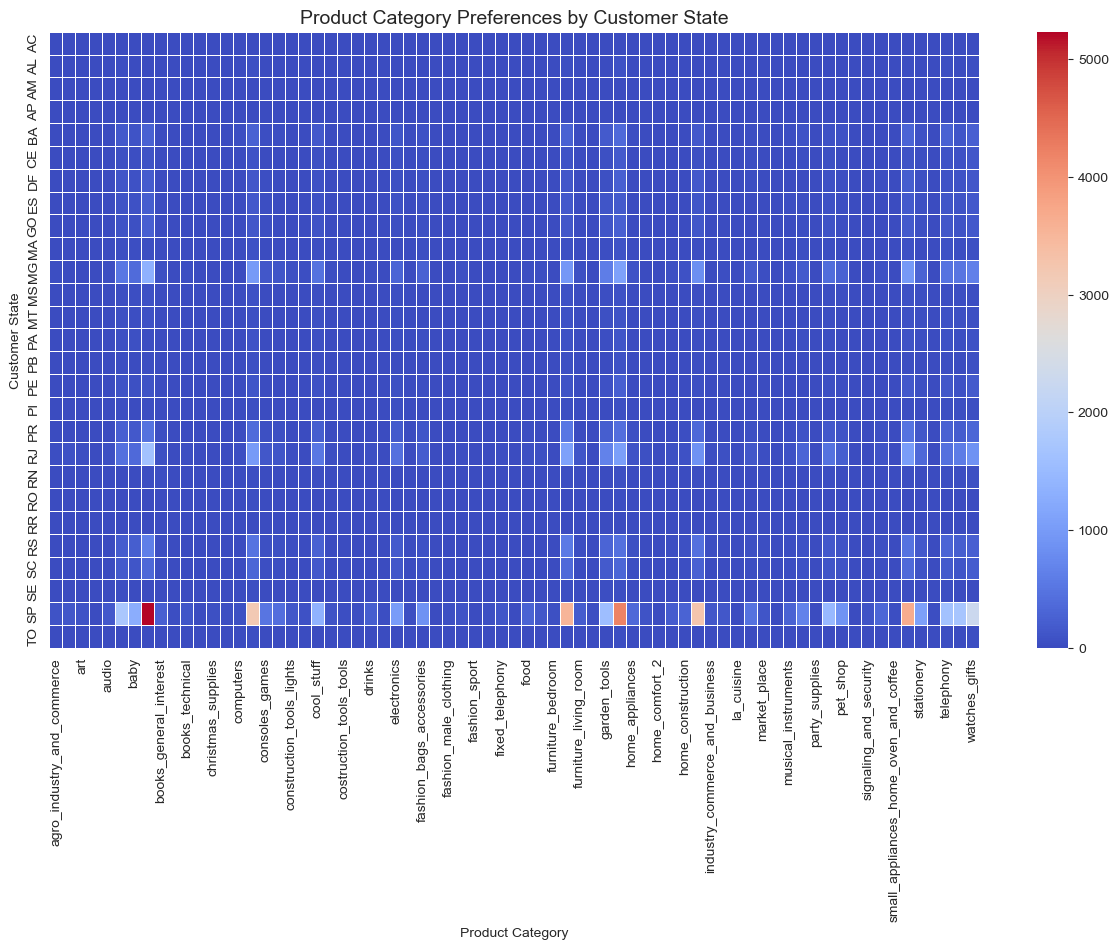

In [ ]:
orders_with_products = order_items.merge(products, on="product_id", how="left")
orders_with_products = orders_with_products.merge(product_category, on="product_category_name", how="left")
orders_with_products = orders_with_products.merge(orders, on="order_id", how="left")
orders_with_products = orders_with_products.merge(customer, on="customer_id", how="left")

# Group by state and product category to count purchases
category_preference = (
    orders_with_products.groupby(["customer_state", "product_category_name_english"])
    .agg(total_products_sold=("order_id", "count"))
    .reset_index()
)

# Create a pivot table for visualization
pivot_table = category_preference.pivot(index="customer_state", columns="product_category_name_english", values="total_products_sold").fillna(0)

# Plot heatmap to visualize category preferences across states
plt.figure(figsize=(15, 8))
sns.heatmap(pivot_table, cmap="coolwarm", linewidths=0.5, linecolor="white")
plt.title("Product Category Preferences by Customer State", fontsize=14)
plt.xlabel("Product Category")
plt.ylabel("Customer State")
plt.xticks(rotation=90)
plt.show()


* This chart represents Product Category Preferences of customer by their State

In [ ]:
orders_with_products = order_items.merge(products, on="product_id", how="left")
orders_with_products = orders_with_products.merge(product_category, on="product_category_name", how="left")
orders_with_products = orders_with_products.merge(orders, on="order_id", how="left")
orders_with_products = orders_with_products.merge(customer, on="customer_id", how="left")

# Group by region and product category, count sold products
category_sales = (
    orders_with_products.groupby(["cust_Region", "product_category_name_english"])
    .agg(total_products_sold=("order_id", "count"))
    .reset_index()
)

# Find top 5 selling products per region
top5_per_region = category_sales.sort_values(["cust_Region", "total_products_sold"], ascending=[True, False])
top5_per_region = top5_per_region.groupby("cust_Region").head(5)

# Display the DataFrame
top5_per_region


,cust_Region,product_category_name_english,total_products_sold
38,Midwest,health_beauty,612
7,Midwest,bed_bath_table,563
60,Midwest,sports_leisure,530
34,Midwest,furniture_decor,408
13,Midwest,computers_accessories,385
101,North,health_beauty,211
79,North,computers_accessories,174
120,North,sports_leisure,166
123,North,telephony,145
125,North,watches_gifts,144


* Types of products most preferred and sold across all regions.

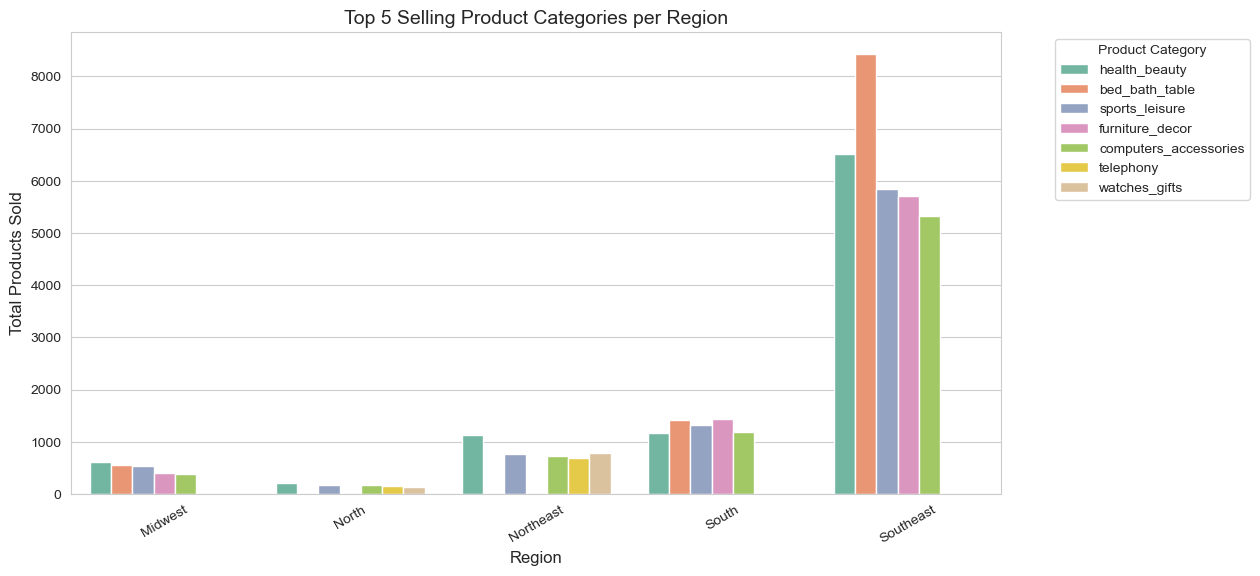

In [ ]:
# Set figure size
plt.figure(figsize=(12, 6))

# Create a bar plot for top 5 products per region
sns.barplot(
    data=top5_per_region,
    x="cust_Region",
    y="total_products_sold",
    hue="product_category_name_english",
    palette="Set2"
)

# Labels and Title
plt.xlabel("Region", fontsize=12)
plt.ylabel("Total Products Sold", fontsize=12)
plt.title("Top 5 Selling Product Categories per Region", fontsize=14)
plt.xticks(rotation=30)
plt.legend(title="Product Category", bbox_to_anchor=(1.05, 1), loc="upper left")

# Show the plot
plt.show()


* health_beauty, Sports_leisure and computer_accessories are most common preferred product in all regions.

In [ ]:
orders_with_products = order_items.merge(products, on="product_id", how="left")
orders_with_products = orders_with_products.merge(product_category, on="product_category_name", how="left")
orders_with_products = orders_with_products.merge(orders, on="order_id", how="left")
orders_with_products = orders_with_products.merge(customer, on="customer_id", how="left")

# Group by state and product category, count total sales
category_sales_per_state = (
    orders_with_products.groupby(["customer_state", "product_category_name_english"])
    .agg(total_products_sold=("order_id", "count"))
    .reset_index()
)

# Find the top 5 selling products per state
top5_per_state = category_sales_per_state.sort_values(
    ["customer_state", "total_products_sold"], ascending=False
)
top5_per_state = top5_per_state.groupby("customer_state").head(5)

top5_per_state


,customer_state,product_category_name_english,total_products_sold
1335,TO,health_beauty,35
1354,TO,watches_gifts,30
1350,TO,sports_leisure,25
1324,TO,computers_accessories,21
1352,TO,telephony,21
...,...,...,...
12,AC,furniture_decor,12
6,AC,computers_accessories,9
22,AC,sports_leisure,9
15,AC,health_beauty,7


* Types of products most preferred and sold across all states.

In [ ]:
orders_with_products = order_items.merge(products, on="product_id", how="left")
orders_with_products = orders_with_products.merge(product_category, on="product_category_name", how="left")
orders_with_products = orders_with_products.merge(orders, on="order_id", how="left")
orders_with_products = orders_with_products.merge(customer, on="customer_id", how="left")

# Group by region, state, and product category, count total sales
category_sales_per_state = (
    orders_with_products.groupby(["cust_Region", "customer_state", "product_category_name_english"])
    .agg(total_products_sold=("order_id", "count"))
    .reset_index())

# Find the top 5 selling products per state
top5_per_state = category_sales_per_state.sort_values(
    ["cust_Region", "customer_state", "total_products_sold"], ascending= False)

top5_per_state = top5_per_state.groupby(["cust_Region", "customer_state"]).head(5)

top5_per_state


,cust_Region,customer_state,product_category_name_english,total_products_sold
1292,Southeast,SP,bed_bath_table,5235
1328,Southeast,SP,health_beauty,4201
1349,Southeast,SP,sports_leisure,3667
1324,Southeast,SP,furniture_decor,3530
1334,Southeast,SP,housewares,3265
...,...,...,...,...
34,Midwest,DF,health_beauty,229
54,Midwest,DF,sports_leisure,212
6,Midwest,DF,bed_bath_table,194
39,Midwest,DF,housewares,145


* Types of products most preferred and sold across all states.

In [ ]:
# Count number of times each product was ordered
top_products = orders_with_products.groupby("product_id").agg(
    total_orders=("order_id", "count")).reset_index()

# Sort in descending order to get top 5
top_5_products = top_products.sort_values("total_orders", ascending=False).head(10)

# Merge with products dataset to get product category
top_5_products = top_5_products.merge(products, on="product_id", how="left")

top_5_products = top_5_products.merge(
    product_category, on="product_category_name", how="left")

top_5_products[["product_id", "product_category_name_english", "total_orders"]]


,product_id,product_category_name_english,total_orders
0,aca2eb7d00ea1a7b8ebd4e68314663af,furniture_decor,527
1,99a4788cb24856965c36a24e339b6058,bed_bath_table,488
2,422879e10f46682990de24d770e7f83d,garden_tools,484
3,389d119b48cf3043d311335e499d9c6b,garden_tools,392
4,368c6c730842d78016ad823897a372db,garden_tools,388
5,53759a2ecddad2bb87a079a1f1519f73,garden_tools,373
6,d1c427060a0f73f6b889a5c7c61f2ac4,computers_accessories,343
7,53b36df67ebb7c41585e8d54d6772e08,watches_gifts,323
8,154e7e31ebfa092203795c972e5804a6,health_beauty,281
9,3dd2a17168ec895c781a9191c1e95ad7,computers_accessories,274


* `Furniture` is most order product in all 73 categories.

C:\Users\DELL\AppData\Local\Temp\ipykernel_21320\609547646.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




Text(0.5, 1.0, 'Top Most Ordered Products')

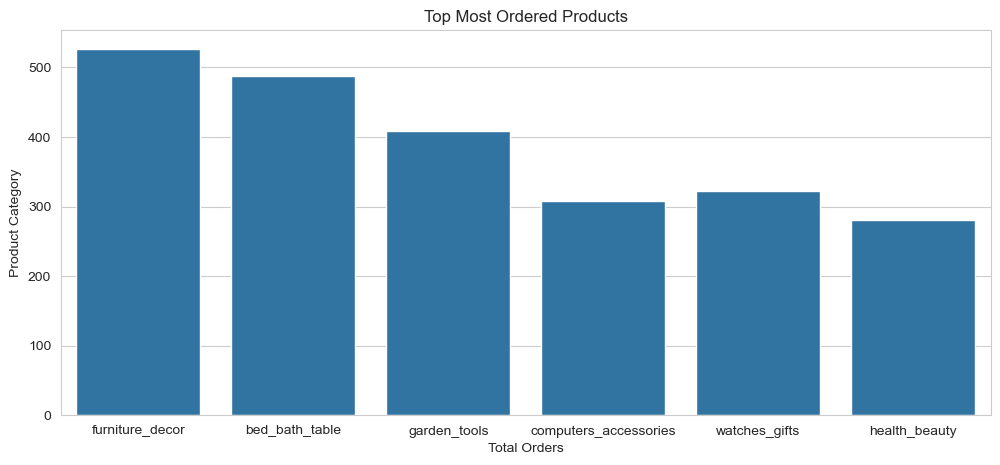

In [ ]:
plt.figure(figsize=(12, 5))
sns.barplot(
    y=top_5_products["total_orders"],
    x=top_5_products["product_category_name_english"], ci= None)

plt.xlabel("Total Orders")
plt.ylabel("Product Category")
plt.title("Top Most Ordered Products")

In [ ]:
revenue_data = order_items.merge(products, on="product_id", how="left")
revenue_data = revenue_data.merge(product_category, on="product_category_name", how="left")
revenue_data = revenue_data.merge(orders, on="order_id", how="left")
revenue_data = revenue_data.merge(customer, on="customer_id", how="left")

# Calculate total revenue per product category per state
revenue_by_state_category = (
    revenue_data.groupby(["customer_state", "cust_Region", "product_category_name_english"])
    .agg(total_revenue=("price", "sum"))
    .reset_index()
)

# Find the highest revenue-generating category in each state
top_category_per_state = (
    revenue_by_state_category.loc[
        revenue_by_state_category.groupby("customer_state")["total_revenue"].idxmax()
    ]
)

# Find the highest revenue-generating category per region
top_category_per_region = (
    revenue_by_state_category.loc[
        revenue_by_state_category.groupby("cust_Region")["total_revenue"].idxmax()
    ]
)

# Display results
top_category_per_state


,customer_state,cust_Region,product_category_name_english,total_revenue
22,AC,North,sports_leisure,1677.46
50,AL,Northeast,health_beauty,12780.26
88,AM,North,health_beauty,2776.03
111,AP,North,computers_accessories,2149.52
165,BA,Northeast,health_beauty,51367.91
219,CE,Northeast,health_beauty,32419.18
299,DF,Midwest,watches_gifts,28721.05
357,ES,Southeast,watches_gifts,29461.00
419,GO,Midwest,watches_gifts,33257.72
448,MA,Northeast,health_beauty,12747.18


* Most purchased product and their revenue from each state.
* Observed that `health_beauty` and `watches_gifts` are common among most of the states. 

In [ ]:
top_category_per_region

,customer_state,cust_Region,product_category_name_english,total_revenue
419,GO,Midwest,watches_gifts,33257.72
674,PA,North,health_beauty,23755.83
165,BA,Northeast,health_beauty,51367.91
1083,RS,South,bed_bath_table,60270.74
1254,SP,Southeast,bed_bath_table,478284.52


* These are the top 3 products making high revenue comparing to other products in all states. 

#### Reviews

In [ ]:
order_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_state_x,product_id_x,product_category_name,customer_state_y,product_id_y
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,SP,fd25ab760bfbba13c198fa3b4f1a0cd3,esporte_lazer,SP,fd25ab760bfbba13c198fa3b4f1a0cd3
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,SP,fd25ab760bfbba13c198fa3b4f1a0cd3,esporte_lazer,SP,fd25ab760bfbba13c198fa3b4f1a0cd3
2,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,SP,fd25ab760bfbba13c198fa3b4f1a0cd3,esporte_lazer,SP,fd25ab760bfbba13c198fa3b4f1a0cd3
3,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,SP,fd25ab760bfbba13c198fa3b4f1a0cd3,esporte_lazer,SP,fd25ab760bfbba13c198fa3b4f1a0cd3
4,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,SP,be0dbdc3d67d55727a65d4cd696ca73c,informatica_acessorios,SP,be0dbdc3d67d55727a65d4cd696ca73c
...,...,...,...,...,...,...,...,...,...,...,...,...
157178,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30,GO,4fb209073dc2ab6a6d3c259a7c285501,moveis_decoracao,GO,4fb209073dc2ab6a6d3c259a7c285501
157179,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42,RJ,3a33c980b62eb1ef3b8ae61b6fc6fe55,brinquedos,RJ,3a33c980b62eb1ef3b8ae61b6fc6fe55
157180,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43,MG,8ba0118a487ec8671aed57e5ef846574,papelaria,MG,8ba0118a487ec8671aed57e5ef846574
157181,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13,MG,73a7fbf8c1048131f3b531af31bcdf0e,esporte_lazer,MG,73a7fbf8c1048131f3b531af31bcdf0e


In [ ]:
order_reviews["review_comment_title"] = order_reviews["review_comment_title"].fillna("não disponível")
order_reviews["review_comment_message"] = order_reviews["review_comment_message"].fillna("não disponível")

In [ ]:
order_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_state_x,product_id_x,product_category_name,customer_state_y,product_id_y
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,não disponível,não disponível,2018-01-18 00:00:00,2018-01-18 21:46:59,SP,fd25ab760bfbba13c198fa3b4f1a0cd3,esporte_lazer,SP,fd25ab760bfbba13c198fa3b4f1a0cd3
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,não disponível,não disponível,2018-01-18 00:00:00,2018-01-18 21:46:59,SP,fd25ab760bfbba13c198fa3b4f1a0cd3,esporte_lazer,SP,fd25ab760bfbba13c198fa3b4f1a0cd3
2,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,não disponível,não disponível,2018-01-18 00:00:00,2018-01-18 21:46:59,SP,fd25ab760bfbba13c198fa3b4f1a0cd3,esporte_lazer,SP,fd25ab760bfbba13c198fa3b4f1a0cd3
3,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,não disponível,não disponível,2018-01-18 00:00:00,2018-01-18 21:46:59,SP,fd25ab760bfbba13c198fa3b4f1a0cd3,esporte_lazer,SP,fd25ab760bfbba13c198fa3b4f1a0cd3
4,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,não disponível,não disponível,2018-03-10 00:00:00,2018-03-11 03:05:13,SP,be0dbdc3d67d55727a65d4cd696ca73c,informatica_acessorios,SP,be0dbdc3d67d55727a65d4cd696ca73c
...,...,...,...,...,...,...,...,...,...,...,...,...
157178,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,não disponível,não disponível,2018-07-07 00:00:00,2018-07-14 17:18:30,GO,4fb209073dc2ab6a6d3c259a7c285501,moveis_decoracao,GO,4fb209073dc2ab6a6d3c259a7c285501
157179,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,não disponível,não disponível,2017-12-09 00:00:00,2017-12-11 20:06:42,RJ,3a33c980b62eb1ef3b8ae61b6fc6fe55,brinquedos,RJ,3a33c980b62eb1ef3b8ae61b6fc6fe55
157180,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,não disponível,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43,MG,8ba0118a487ec8671aed57e5ef846574,papelaria,MG,8ba0118a487ec8671aed57e5ef846574
157181,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,não disponível,não disponível,2018-07-01 00:00:00,2018-07-02 12:59:13,MG,73a7fbf8c1048131f3b531af31bcdf0e,esporte_lazer,MG,73a7fbf8c1048131f3b531af31bcdf0e


In [ ]:
reviews_not_given = order_reviews[
    (order_reviews['review_comment_title'] == 'não disponível') & 
    (order_reviews['review_comment_message'] == 'não disponível')
].shape[0]

print(f'Total Orders : {total_orders}')
print(f'Reviews not given: {reviews_not_given}')
reviews_given = total_orders - reviews_not_given
print(f'Reviews_given : {reviews_given}')


Total Orders : 99441
Reviews not given: 83659
Reviews_given : 15782


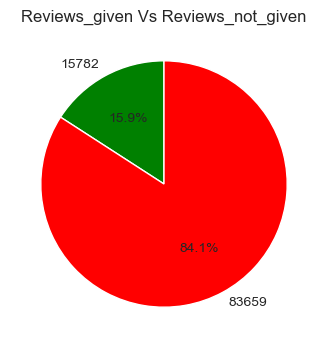

In [ ]:
plt.figure(figsize=(4, 4))
plt.pie([reviews_given, reviews_not_given], labels= [reviews_given, reviews_not_given], autopct="%1.1f%%", colors=["green", "red"], startangle=90)
plt.title("Reviews_given Vs Reviews_not_given")
plt.show()

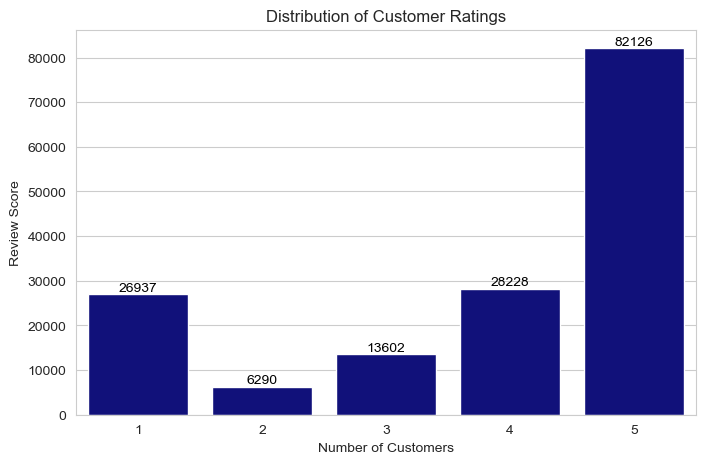

In [ ]:
rating_counts = order_reviews["review_score"].value_counts().sort_index()

plt.figure(figsize=(8, 5))
ax= sns.barplot(y=rating_counts.values, x=rating_counts.index, color='darkblue')
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only label non-zero bars
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2, height), 
                    ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel("Number of Customers")
plt.ylabel("Review Score")
plt.title("Distribution of Customer Ratings")
plt.show()


In [ ]:
product_reviews = order_items.merge(order_reviews[["order_id", "review_score"]], on="order_id", how="left")

# Calculate average rating per product
product_avg_ratings = product_reviews.groupby("product_id")["review_score"].mean().reset_index()

# Sort by highest rating
product_avg_ratings = product_avg_ratings.sort_values(by="review_score", ascending=False)

# Get product name by merging with products dataset
top_rated_product = product_avg_ratings.merge(products[["product_id", "product_category_name"]],
                                              on="product_id", how="left").head(1)
top_rated_product = top_rated_product.merge(product_category, on='product_category_name', how='left')

top_rated_product


,product_id,review_score,product_category_name,product_category_name_english
0,00066f42aeeb9f3007548bb9d3f33c38,5.0,perfumaria,perfumery


In [408]:
orders_with_state = orders.merge(customer[["customer_id", "customer_state"]], on="customer_id", how="left")

# Count the number of orders per state
state_orders = orders_with_state.groupby("customer_state")["order_id"].count().reset_index()
state_orders.rename(columns={"order_id": "total_orders"}, inplace=True)

orders_reviews = orders_with_state.merge(order_reviews[["order_id"]], on="order_id", how="left")

# Count number of reviews per state
state_reviews = orders_reviews.groupby("customer_state")["order_id"].count().reset_index()
state_reviews.rename(columns={"order_id": "total_reviews"}, inplace=True)

# Merge state-wise orders and reviews count
state_orders_reviews = state_orders.merge(state_reviews, on="customer_state", how="left").fillna(0)

state_orders_reviews


,customer_state,total_orders,total_reviews
0,AC,81,81
1,AL,412,416
2,AM,148,149
3,AP,68,68
4,BA,3371,3388
5,CE,1332,1333
6,DF,1969,1988
7,ES,2027,2037
8,GO,2011,2028
9,MA,743,747


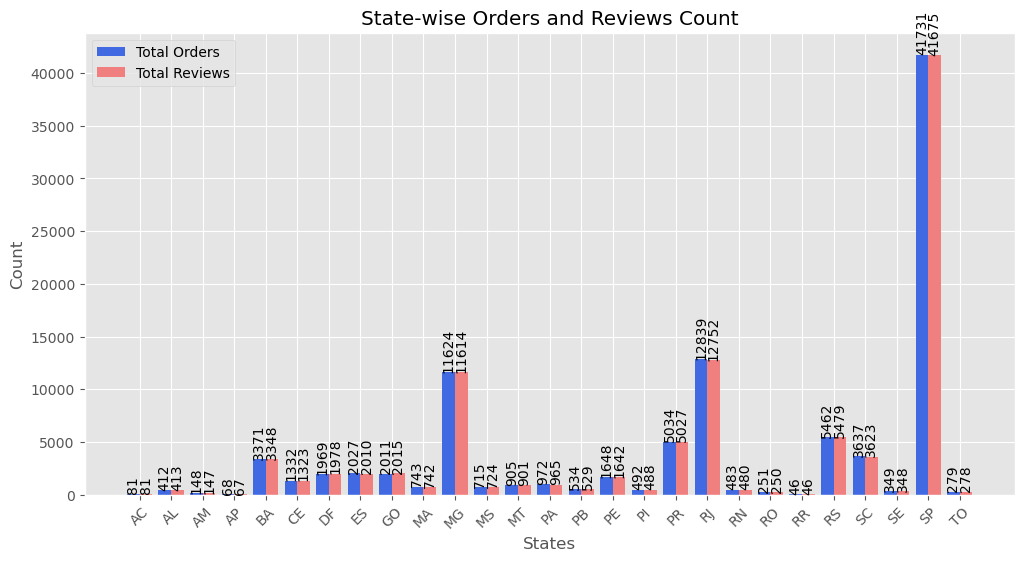

In [ ]:
# Define the states, orders, and reviews
states = state_orders_reviews["customer_state"]
orders = state_orders_reviews["total_orders"]
reviews = state_orders_reviews["total_reviews"]

# Set width for bars
bar_width = 0.4
x_indexes = np.arange(len(states))

# Create figure
plt.figure(figsize=(12, 6))

# Plot bars
bars1 = plt.bar(x_indexes - bar_width/2, orders, width=bar_width, label="Total Orders", color="royalblue")
bars2 = plt.bar(x_indexes + bar_width/2, reviews, width=bar_width, label="Total Reviews", color="lightcoral")

# Add data labels on top of each bar (rotated 90 degrees)
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{int(bar.get_height())}", 
             ha='center', va='bottom', fontsize=10, rotation=90)

for bar in bars2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{int(bar.get_height())}", 
             ha='center', va='bottom', fontsize=10, rotation=90)

# Labels and Title
plt.xlabel("States")
plt.ylabel("Count")
plt.title("State-wise Orders and Reviews Count")
plt.xticks(ticks=x_indexes, labels=states, rotation=45)
plt.legend()

# Show Plot
plt.show()


In [409]:
merged_df = pd.merge(order_reviews, order_items, on="order_id")
merged_df = pd.merge(merged_df, products, on="product_id")
merged_df= merged_df.merge(product_category, on="product_category_name", how="left")


# Group by product category and calculate average rating
avg_rating_per_category = merged_df.groupby("product_category_name_english")["review_score"].mean().reset_index()

# Rename column
avg_rating_per_category.rename(columns={"review_score": "average_rating"}, inplace=True)

# Sort by average rating in descending order
avg_rating_per_category = avg_rating_per_category.sort_values(by="average_rating", ascending=False)

# Display top results
avg_rating_per_category


,product_category_name_english,average_rating
11,cds_dvds_musicals,4.642857
29,fashion_childrens_clothes,4.500000
8,books_general_interest,4.446266
22,costruction_tools_tools,4.444444
35,flowers,4.419355
...,...,...
30,fashion_male_clothing,3.641221
46,home_comfort_2,3.629630
57,office_furniture,3.493183
23,diapers_and_hygiene,3.256410


* Average rating given per each product.
* Obseved that we have `49` categories have more than `4.0` rating.

In [414]:
orders = orders.merge(customer[['customer_id', 'customer_state']], on='customer_id', how='left')
#order_reviews = order_reviews[['order_id', 'review_score']]
order_reviews = order_reviews.merge(orders[['order_id', 'customer_state']], on='order_id', how='left')
order_reviews = order_reviews.merge(order_items[['order_id', 'product_id']], on='order_id', how='left')

order_reviews = order_reviews.merge(products[['product_id', 'product_category_name']], on='product_id', how='left')
order_reviews= order_reviews.merge(product_category, on="product_category_name", how="left")

# Filter products with ratings less than or equal to 2
low_rated_products = order_reviews[order_reviews['review_score'] <= 2]

# Count occurrences by state and product category
low_rated_products_by_state = low_rated_products.groupby(['customer_state', 'product_category_name_english']).size().reset_index(name='count')

# Convert result to DataFrame
low_rated_products_df = pd.DataFrame(low_rated_products_by_state)

# Display result
low_rated_products_df


,customer_state,product_category_name_english,count
0,AC,auto,1
1,AC,bed_bath_table,3
2,AC,computers,1
3,AC,computers_accessories,2
4,AC,cool_stuff,1
...,...,...,...
884,TO,housewares,1
885,TO,sports_leisure,3
886,TO,telephony,5
887,TO,toys,1


In [ ]:


# Merge orders with customers to get customer states
orders = orders.merge(customer[['customer_id', 'customer_state']], on='customer_id', how='left')

# Merge reviews with orders to get state information
order_reviews = order_reviews[['order_id', 'review_score']]
order_reviews = order_reviews.merge(orders[['order_id', 'customer_state']], on='order_id', how='left')

# Merge with order items to get product IDs
order_reviews = order_reviews.merge(order_items[['order_id', 'product_id']], on='order_id', how='left')

# Merge with products to get product names
order_reviews = order_reviews.merge(products[['product_id', 'product_category_name']], on='product_id', how='left')
order_reviews = order_reviews.merge(product_category, on='product_category_name', how= 'left')

# Filter products with ratings less than or equal to 2
low_rated_products = order_reviews[order_reviews['review_score'] <= 2]

# Count occurrences by state and product category
low_rated_products_by_state = low_rated_products.groupby(['customer_state', 'product_category_name_english']).size().reset_index(name='count')

# Convert result to DataFrame
low_rated_products_df = pd.DataFrame(low_rated_products_by_state)

# Find most common low-rated products
top_low_rated_products = low_rated_products['product_category_name_english'].value_counts().reset_index()
top_low_rated_products.columns = ['product_category_name', 'low_rating_count']

# Display result
low_rated_products_df



,customer_state,product_category_name_english,count
0,AC,auto,1
1,AC,bed_bath_table,3
2,AC,computers,1
3,AC,computers_accessories,2
4,AC,cool_stuff,1
...,...,...,...
884,TO,housewares,1
885,TO,sports_leisure,3
886,TO,telephony,5
887,TO,toys,1


In [ ]:
top_low_rated_products

,product_category_name,low_rating_count
0,bed_bath_table,2112
1,furniture_decor,1621
2,computers_accessories,1461
3,health_beauty,1321
4,sports_leisure,1260
...,...,...
65,fashion_sport,3
66,arts_and_craftmanship,3
67,flowers,2
68,security_and_services,1


#### Payments

In [ ]:
order_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [ ]:
order_payments[order_payments['payment_type']=='not_defined']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0


In [ ]:
order_payments = order_payments[order_payments['payment_type'] != 'not_defined']

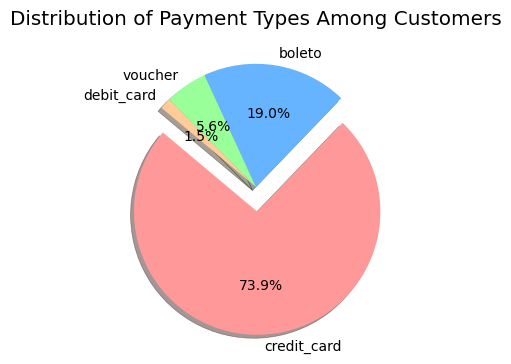

In [ ]:
# Distribution of payment types
payment_distribution = order_payments['payment_type'].value_counts()

# Plot pie chart
plt.figure(figsize=(4,4))
plt.pie(payment_distribution, labels=payment_distribution.index, autopct='%1.1f%%', colors=["#ff9999", "#66b3ff", "#99ff99", "#ffcc99"], startangle=140, explode= [0.2, 0, 0, 0], shadow= True)
plt.title('Distribution of Payment Types Among Customers')
plt.show()


#### Summary

**customer retention**
* insights:
    1. Observed that only South East and South regions have more customers, while Northeast and Midwest regions have a minimum amount of customers but only North region have very less customers.
    2. There is significant growth in customers from year 2016 to 2018 but some states have increased their customers while some states that belongs to North region have decreased customers.

* Actions:
    1. VIP Membership for High-Spending Customers
    Offer exclusive perks like:
    Free shipping, Early access to sales
    2. Customers earn points on every purchase so that they can redeem on next purchase.
    3. Make campaigns, offer discounts and special discounts on their birthdays, during featival seasons.



**customer Expereince**
* Insights: 
    1. Customers of Olist are placing their orders in between 10th hour to 21st hour of a day.
    2. More number of orders placing on the first three days in a week.
    3. March, May, July, August, November months have more sales. As these months have most celebrated festivals of Brazilian people.

    March(Carnival (Carnaval)), May(Mother’s Day), July(Festa de São João (Saint John’s Festival)), August(Father's day), November(Proclamation of the Republic (Proclamação da República), Balck Friday)

    4. Computers_accessories, health_beauty, bed_bath_table, watches_gifts, housewares and toys are most sold product categories during these festival seasons.

* Actions:
    1. Olist can maintain their market platform to fix their issues during low peak times and can improve customer buying experience.
    2. It can run advertisement on their website and introduce their new products as per demands, and can do promotions on their products during weekdays to grab customers attention.



**Product Quality**
* Insights:
    1. health_beauty, sports_leisure, watches_gifts and computer_accessories are most common categories preferred in all regions.
    2. Perfumery category is the highest rated product(rating=5.0)
    3. bed_bath_table, furniture_decor, health_beauty, computer_accessories are low rated products.
    4. Observed that most common purchased product categories are also having low-rating.

* Actions:
    1. Improve quality of products with consistently low ratings to maintain customer trust.
    2. Ensure that pre-shipment inspections are done to reduce defective or damaged products from reaching customers.



**Delivery performance**
* Insights:
    1. Average delivery time taking to delivery is 12.09 days
    2. Southeast states are getting more deliveries in less time as there many sellers available in their states.
    3. Some states are getting their products delivered lately than estimated time due to the seller and customer locations are very far.
    4. Due to far distance to delivery the shipping charges are also varying state to state.

* Actions
    1. olist should expand their sales in all necessary areas. They should grow their seller base gradually rather than all at once.
    2. If possible they even expand their stocks and can also increase their warehouses wherever needed.